In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
import seaborn as sns

import cartopy.crs as ccrs

import statsmodels

import os
from tqdm import tqdm

from convertbng.util import convert_bng, convert_lonlat
import utm

In [39]:
# code and species dictionary

code_df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Alberta/To_look_at/Banff_NP_Freshwater_Lake_Fish_Index_2017_data_dictionary.csv')
# code_df = code_df.iloc[:-6]
code_df.rename(columns={'Data_Value_Valeur_de_la_donnée': 'code_name', 
                        'Value_Description_EN_Description_de_la_valeur': 'common_name'}, inplace=True)
code_df = code_df[['code_name', 'common_name']]
code_df['common_name'] = code_df['common_name'].str.lower().str.replace(' ', '_')
display(code_df.sample(5))

dict_code_name = code_df.set_index('code_name').to_dict()['common_name']

,code_name,common_name
7,LKWH,lake_whitefish
9,LRSC,largescale_sucker
18,ARGR,arctic_grayling
21,BRMN,brassy_minnow
10,MATR,marstoni_trout


In [52]:
new_codes = {'LNDC': 'longnose_dace', 'BNTR': 'brown_trout', 'RNTR1': 'rainbow_trout', 'CTTR1': 'cutthroat_trout', 
             'WHSC': 'white_sucker', 'BLTRCTTR(N&I)': 'bull_trout_x_cutthroat_trout', 'CTTR(hybrids)': 'cutthroat_trout', 
             'CTTRhybrids': 'cutthroat_trout', 'SUCK': 'white_sucker'}

dict_code_name.update(new_codes)

In [4]:
# Species dictionay

rsi_pres = pd.read_csv('/mnt/c/Users/imrit/Desktop/Gen_fish_Sharma/RSI_survey/Presence_absence/RSI_survey_2020_st_lawrence_presence_absence.csv')
rsi_pres['Taxon'] = rsi_pres['Taxon'].str.lower().str.replace(' ', '_')
rsi_pres['Latin name'] = rsi_pres['Latin name'].str.lower().str.replace(' ', '_')

dict_species_name = rsi_pres.set_index('Taxon').to_dict()['Latin name']

/home/arshad/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [177]:
new_names = {'lake_chub': 'couesius_plumbeus', 'finescale_dace': 'chrosomus_neogaeus', 'tullibee_(cisco)': 'coregonus_artedi', 
             'bull_trout': 'salvelinus_confluentus', 'grass_carp': 'ctenopharyngodon_idella', 'goldeye': 'hiodon_alosoides',
             'flathead_chub': 'Platygobio gracilis', 'threespine_stickleback': 'gasterosteus aculeatus', 
             'northern_redbelly_dace': 'chrosomus_eos', 'mountain_whitefish': 'prosopium_williamsoni', 
             'arctic_grayling': 'thymallus_arcticus', 'minnow_family': 'cyprinidae_spp', 
             'brassy_minnow': 'hybognathus_hankinsoni', 'arctic_grayling_(belly_popln)': 'thymallus_arcticus', 
             'river_shiner': 'notropis_blennius', 'sucker_family': 'catostomidae_spp', 'pygmy_whitefish': 'prosopium_coulterii', 
             'athabasca_rainbow_trout': 'oncorhynchus_mykiss', 'round_whitefish': 'prosopium_cylindraceum', 
             'largescale_sucker': 'catostomus_macrocheilus', 'northern_crayfish': 'orconectes_virilis', 
             'mountain_sucker': 'catostomus_platyrhynchus', 'redside_shiner': 'richardsonius_balteatus', 
             'cutthroat_trout': 'oncorhynchus_clarkii', 'bull_trout_x_brook_trout_hybrid': 'salvelinus_fontinalis_x_confluentus', 
             'prussian_carp': 'carassius_gibelio', 'tiger_trout': 'salmo_trutta_x_salvelinus_fontinalis', 
             'northern_redbelly_dace_x_finescale_dace': 'chrosomus_eos_×_chrosomus_neogaeus', 'sculpin_sp.': 'cottoidea_spp',
             'northern_pikeminnow': 'ptychocheilus_oregonensis', 'yellowtone_cutthroat_trout': 'oncorhynchus_clarkii_bouvieri',
             'cutthroat_trout_x_rainbow_trout': 'oncorhynchus_clarkii_x_oncorhynchus_mykiss', 
             'golden_trout': 'oncorhynchus_aguabonita', 'westslope_cutthroat_trout': 'oncorhynchus_clarkii', 
             'kokanee': 'oncorhynchus_nerka', 'tiger_salamander': 'ambystoma_tigrinum', 'dolly_varden': 'salvelinus_malma', 
             'giant_floater': 'pyganodon_grandis', 'trout_family': 'salmonidae_spp', 'arctic_char': 'salvelinus_alpinus', 
             'tullibee_(cisco)_x_lake_whitefish': 'coregonus_artedi_x_coregonus_clupeaformis', 'trout': 'salmonidae_spp', 
             'black_bullhead': 'ameiurus_melas', 'prickly_sculpin': 'cottus_asper', 'peamouth_chub': 'mylocheilus_caurinus', 
             'chinese_mystery_snail': 'cipangopaludina_chinensis', 'western_silvery_minnow': 'hybognathus_argyritis', 
             'rocky_mountain_sculpin': 'cottus_spp', 'threespine_stickleback': 'gasterosteus_aculeatus', 'cichlid': 'cichlidae', 
             'carp_sp.': 'cyprinidae', 'koi': 'cyprinus_rubrofuscus', 'shortjaw_cisco': 'coregonus_zenithicus', 
             'trout-perch': 'percopsis_omiscomaycus', 'splake': 'salvelinus_fontinalis_×_salvelinus_namaycush', 
             'trout_perch': 'percopsis_omiscomaycus', 'ouaniche': 'salmo_salar', 'longsnose_dace': 'rhinichthys_cataractae',
             'bull_trout_x_cutthroat_trout': 'salvelinus_confluentus_x_oncorhynchus_clarkii'}

dict_species_name.update(new_names)
dict_species_name

{'striped_bass': 'morone_saxatilis',
 'american_shad': 'alosa_sapidissima',
 'white_sucker': 'catostomus_commersonii',
 'channel_catfish': 'ictalurus_punctatus',
 'mooneye': 'hiodon_tergisus',
 'walleye': 'sander_vitreus',
 'lake_sturgeon': 'acipenser_fulvescens',
 'rainbow_smelt': 'osmerus_mordax',
 'longnose_sucker': 'catostomus_catostomus',
 'alewife': 'alosa_pseudoharengus',
 'american_eel': 'anguilla_rostrata',
 'white_perch': 'morone_americana',
 'quillback': 'carpiodes_cyprinus',
 'smallmouth_bass': 'micropterus_dolomieu',
 'silver_redhorse': 'moxostoma_anisurum',
 'logperch': 'percina_caprodes',
 'tessellated_darter': 'etheostoma_olmstedi',
 'brown_bullhead': 'ameiurus_nebulosus',
 'longnose_gar': 'lepisosteus_osseus',
 'freshwater_drum': 'aplodinotus_grunniens',
 'fallfish': 'semotilus_corporalis',
 'channel_darter': 'percina_copelandi',
 'emerald_shiner': 'notropis_atherinoides',
 'johnny_darter': 'etheostoma_nigrum',
 'tadpole_madtom': 'noturus_gyrinus',
 'trout-perch': 'per

In [6]:
species_name_df = pd.DataFrame.from_dict({'common_name': list(dict_species_name.keys()), 
                                        'scientific_name' : list(dict_species_name.values())})
species_name_df.to_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/species_name_dictionary.csv', index=False)

In [91]:
# Quebec map: http://www.environnement.gouv.qc.ca/eau/guide/localisation.asp#onglets

In [295]:
list(dict_species_name.keys())

['striped_bass',
 'american_shad',
 'white_sucker',
 'channel_catfish',
 'mooneye',
 'walleye',
 'lake_sturgeon',
 'rainbow_smelt',
 'longnose_sucker',
 'alewife',
 'american_eel',
 'white_perch',
 'quillback',
 'smallmouth_bass',
 'silver_redhorse',
 'logperch',
 'tessellated_darter',
 'brown_bullhead',
 'longnose_gar',
 'freshwater_drum',
 'fallfish',
 'channel_darter',
 'emerald_shiner',
 'johnny_darter',
 'tadpole_madtom',
 'trout-perch',
 'chestnut_lamprey',
 'largemouth_bass',
 'black_crappie',
 'winter_flounder',
 'three-spined_stickleback',
 'sand_shiner',
 'common_carp',
 'bowfin',
 'greater_redhorse',
 'atlantic_mackerel',
 'brook_trout',
 'atlantic_snailfish',
 'greenland_cod',
 'muskellunge',
 'northern_pike',
 'cisco',
 'banded_killifish',
 'ocean_pout',
 'ninespine_stickleback',
 'polar_cod',
 'tench',
 'atlantic_sturgeon',
 'atlantic_herring',
 'burbot',
 'shorthead_redhorse',
 'mottled_sculpin',
 'yellow_bullhead',
 'american_gizzard_shad',
 'american_sand_lance',
 'mim

In [ ]:
df['water_body'] 

In [129]:
# df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Gen Fish Quebec Fish Consumption Data - Sheet1.csv')
df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Quebec/quebec_fish_consumption_oct_07_2020.csv')

df['Latitude'] = df['Latitude'].str.replace(',', '.').astype(float)
df['Longitude'] = df['Longitude'].str.replace(',', '.').astype(float)
df.rename(columns={"Plan d'eau": 'water_body', 'Bassin Primaire': 'primary_bassin', 
                   'Bassin secondaire': 'secondary_bassin'}, inplace=True)
display(df.tail())

# df.to_csv('/mnt/c/Users/imrit/Desktop/Gen_fish_Sharma/Quebec/quebec_fish_consumption_oct_07_2020.csv', index=False)

,water_body,primary_bassin,secondary_bassin,Latitude,Longitude,Site,Species_1,Species_2,Species_3,Species_4,...,Species_6,Species_7,Species_8,Species_9,Species_10,Species_11,Species_12,Species_13,Species_14,Species_15
1261,"Jeannine, Lac","Saguenay, Rivière","Iroquois, Rivière aux",48.399110,-72.502142,NaN,Omble de fontaine,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1262,"Loutre, Lac à la","Saguenay, Rivière","Iroquois, Rivière aux",48.407286,-72.444312,NaN,Omble de fontaine,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1263,"Rond, Lac","Saguenay, Rivière","Ouiatchouan, Rivière",48.374990,-72.329779,NaN,Omble de fontaine,Touladi,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1264,"Carpe, Lac à la","Saguenay, Rivière","Métabetchouane, Rivière",48.218289,-71.861658,NaN,Omble de fontaine,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1265,"Vert, Lac","Saguenay, Rivière","Belle Rivière, La",48.364633,-71.642305,NaN,Éperlan arc-en-ciel,Meunier noir,Omble de fontaine,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Convert species name to common english names

In [130]:
species_df = df[[col for col in df.columns if 'Species' in col]]
# display(species_df.head())

species_list = []
for col in species_df.columns:
    uniques = species_df[col].unique()
    species_list.append(uniques)

species_list = np.unique([species for sublist in species_list for species in sublist])
print(len(species_list))
print(species_list)
# np.unique(species_df.values)

# species_df = pd.DataFrame(species_list)
# species_df.rename(columns={0: 'French_name'}, inplace=True)
# species_df.to_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/species_name.csv', index=False)

species_name_df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/species_name.csv')
# display(species_name_df.head())

dict_species_name = pd.Series(species_name_df['English_name'].values, index=species_name_df['French_name']).to_dict()
dict_species_name

48
['Achigan' "Anguille d'Amérique" 'Barbotte Brune' 'Barbotte brune'
 'Barbue de rivière' 'Baret' 'Brochet maillé' 'Carpe allemande'
 'Chevalier blanc' 'Chevalier rouge' 'Cisco de lac' 'Crapet de roche'
 'Doré jaune' 'Doré noir' 'Esturgeon jaune' 'Esturgeon noir'
 'Flétan du Groenland' 'Grand Brochet' 'Grand brochet' 'Grand corégone'
 'Grand corégone ' 'Laquaiche' 'Lotte' 'Lotte ' 'Malachigan'
 'Marigane noire' 'Maskinongé' 'Meunier Noir' 'Meunier noir'
 'Meunier rouge' 'Morue de roche' 'Moxostome' 'Ménomini rond'
 'Omble chevalier' 'Omble de fontaine' 'Ouananiche' 'Ouitouche'
 'Perchaude' 'Poulamon atlantique' 'Saumon atlantique' 'Sébaste' 'Touladi'
 'Touladi ' 'Truite arc-en-ciel' 'Truite brune' 'Truite moulac' 'nan'
 'Éperlan arc-en-ciel']


{'Achigan': 'largemouth_bass',
 "Anguille d'Amérique": 'american_eel',
 'Barbotte Brune': 'brown_bullhead',
 'Barbotte brune': 'brown_bullhead',
 'Barbue de rivière': 'channel_catfish',
 'Baret': 'white_perch',
 'Brochet maillé': 'chain_pickerel',
 'Carpe allemande': 'common_carp',
 'Chevalier blanc': 'silver_redhorse',
 'Chevalier rouge': 'shorthead_redhorse',
 'Cisco de lac': 'cisco',
 'Crapet de roche': 'rock_bass',
 'Doré jaune': 'walleye',
 'Doré noir': 'sauger',
 'Esturgeon jaune': 'lake_sturgeon',
 'Esturgeon noir': 'gulf_sturgeon',
 'Flétan du Groenland': 'greenland_halibut',
 'Grand Brochet': 'northern_pike',
 'Grand brochet': 'northern_pike',
 'Grand corégone': 'lake_whitefish',
 'Grand corégone ': 'lake_whitefish',
 'Laquaiche': 'goldeneye',
 'Lotte': 'burbot',
 'Lotte ': 'burbot',
 'Malachigan': 'freshwater_drum',
 'Marigane noire': 'black_crappie',
 'Maskinongé': 'muskellunge',
 'Meunier Noir': 'white_sucker',
 'Meunier noir': 'white_sucker',
 'Meunier rouge': 'longnose_su

In [131]:
df.replace(dict_species_name, inplace=True)
display(df.head(10))

,water_body,primary_bassin,secondary_bassin,Latitude,Longitude,Site,Species_1,Species_2,Species_3,Species_4,...,Species_6,Species_7,Species_8,Species_9,Species_10,Species_11,Species_12,Species_13,Species_14,Species_15
0,"Saint-François, Lac","Saint-Laurent, Fleuve",NaN,45.095566,-74.434094,Île au Mouton,largemouth_bass,brown_bullhead,walleye,northern_pike,...,yellow_perch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Richelieu, Rivière","Richelieu, Rivière",NaN,45.029876,-73.332214,Noyan,largemouth_bass,brown_bullhead,white_perch,walleye,...,white_sucker,yellow_perch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Wallace, Lac","Connecticut, River",NaN,45.015270,-71.632880,NaN,largemouth_bass,brown_bullhead,chain_pickerel,white_sucker,...,brown_trout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Lippé, Lac","Saint-François, Rivière","Massawippi, Rivière",45.098055,-71.656944,NaN,rainbow_trout,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Lyster, Lac","Saint-François, Rivière","Massawippi, Rivière",45.029304,-71.907721,NaN,lake_trout,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Tomifobia, Rivière","Saint-François, Rivière","Massawippi, Rivière",45.024953,-72.044600,"Judd's Mills, 1,7 km du pont, amont",white_sucker,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Tomifobia, Rivière","Saint-François, Rivière","Massawippi, Rivière",45.059551,-72.130455,Tomifobia,white_sucker,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Memphrémagog, Lac","Saint-François, Rivière","Magog, Rivière",45.102655,-72.180408,Baie de Fitch,largemouth_bass,brown_bullhead,white_sucker,yellow_perch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Memphrémagog, Lac","Saint-François, Rivière","Magog, Rivière",45.108686,-72.280537,Près du centre du lac,largemouth_bass,brown_bullhead,white_perch,chain_pickerel,...,northern_pike,white_sucker,atlantic_salmon,yellow_perch,lake_trout,brown_trout,NaN,NaN,NaN,NaN
9,"Lovering, Lac","Saint-François, Rivière","Magog, Rivière",45.179984,-72.158771,NaN,largemouth_bass,brown_bullhead,chain_pickerel,white_sucker,...,lake_trout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### get water body type

In [132]:
df['type_water_body'] = df['water_body'].str.split(',').str.get(1)
df['type_primary_bassin'] = df['primary_bassin'].str.split(',').str.get(1)
df['type_secondary_bassin'] = df['secondary_bassin'].str.split(',').str.get(1)
df.head()

,water_body,primary_bassin,secondary_bassin,Latitude,Longitude,Site,Species_1,Species_2,Species_3,Species_4,...,Species_9,Species_10,Species_11,Species_12,Species_13,Species_14,Species_15,type_water_body,type_primary_bassin,type_secondary_bassin
0,"Saint-François, Lac","Saint-Laurent, Fleuve",NaN,45.095566,-74.434094,Île au Mouton,largemouth_bass,brown_bullhead,walleye,northern_pike,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lac,Fleuve,NaN
1,"Richelieu, Rivière","Richelieu, Rivière",NaN,45.029876,-73.332214,Noyan,largemouth_bass,brown_bullhead,white_perch,walleye,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rivière,Rivière,NaN
2,"Wallace, Lac","Connecticut, River",NaN,45.015270,-71.632880,NaN,largemouth_bass,brown_bullhead,chain_pickerel,white_sucker,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lac,River,NaN
3,"Lippé, Lac","Saint-François, Rivière","Massawippi, Rivière",45.098055,-71.656944,NaN,rainbow_trout,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lac,Rivière,Rivière
4,"Lyster, Lac","Saint-François, Rivière","Massawippi, Rivière",45.029304,-71.907721,NaN,lake_trout,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lac,Rivière,Rivière


In [133]:
type_water_list = []
for col in ['type_water_body', 'type_primary_bassin', 'type_secondary_bassin']:
    uniques = df[col].unique()
    type_water_list.append(uniques)

type_water_list = np.unique([type_water for sublist in type_water_list for type_water in sublist])
# print(len(type_water_list))
# print(type_water_list)
# np.unique(species_df.values)

# water_df_names = pd.DataFrame(type_water_list)
# water_df_names.to_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/water_df_names.csv', index=False)

water_df_names= pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/water_df_names.csv')
display(water_df_names.head())

dict_water_type_name = pd.Series(water_df_names['english_name'].values, index=water_df_names['french_name']).to_dict()
# dict_water_type_name

,french_name,english_name
0,Baie du,bay
1,Bras,inlet
2,Bras du,inlet
3,Cours d'eau,watercourse
4,Crique,estuary


In [134]:
df.replace(dict_water_type_name, inplace=True)
display(df)

,water_body,primary_bassin,secondary_bassin,Latitude,Longitude,Site,Species_1,Species_2,Species_3,Species_4,...,Species_9,Species_10,Species_11,Species_12,Species_13,Species_14,Species_15,type_water_body,type_primary_bassin,type_secondary_bassin
0,"Saint-François, Lac","Saint-Laurent, Fleuve",NaN,45.095566,-74.434094,Île au Mouton,largemouth_bass,brown_bullhead,walleye,northern_pike,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lake,river,NaN
1,"Richelieu, Rivière","Richelieu, Rivière",NaN,45.029876,-73.332214,Noyan,largemouth_bass,brown_bullhead,white_perch,walleye,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,river,river,NaN
2,"Wallace, Lac","Connecticut, River",NaN,45.015270,-71.632880,NaN,largemouth_bass,brown_bullhead,chain_pickerel,white_sucker,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lake,river,NaN
3,"Lippé, Lac","Saint-François, Rivière","Massawippi, Rivière",45.098055,-71.656944,NaN,rainbow_trout,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lake,river,river
4,"Lyster, Lac","Saint-François, Rivière","Massawippi, Rivière",45.029304,-71.907721,NaN,lake_trout,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lake,river,river
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,"Jeannine, Lac","Saguenay, Rivière","Iroquois, Rivière aux",48.399110,-72.502142,NaN,brook_trout,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lake,river,river
1262,"Loutre, Lac à la","Saguenay, Rivière","Iroquois, Rivière aux",48.407286,-72.444312,NaN,brook_trout,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lake,river,river
1263,"Rond, Lac","Saguenay, Rivière","Ouiatchouan, Rivière",48.374990,-72.329779,NaN,brook_trout,lake_trout,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lake,river,river
1264,"Carpe, Lac à la","Saguenay, Rivière","Métabetchouane, Rivière",48.218289,-71.861658,NaN,brook_trout,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lake,river,river


### Make species columns

In [135]:
for col in species_name_df['English_name'].unique():
    df[col] = np.where(df.isin([col]).any(1), 1, 0)
display(df.head())    

,water_body,primary_bassin,secondary_bassin,Latitude,Longitude,Site,Species_1,Species_2,Species_3,Species_4,...,atlantic_salmon,fallfish,yellow_perch,winter_cod,rose_fish,lake_trout,rainbow_trout,brown_trout,splake,rainbow_smelt
0,"Saint-François, Lac","Saint-Laurent, Fleuve",NaN,45.095566,-74.434094,Île au Mouton,largemouth_bass,brown_bullhead,walleye,northern_pike,...,0,0,1,0,0,0,0,0,0,0
1,"Richelieu, Rivière","Richelieu, Rivière",NaN,45.029876,-73.332214,Noyan,largemouth_bass,brown_bullhead,white_perch,walleye,...,0,0,1,0,0,0,0,0,0,0
2,"Wallace, Lac","Connecticut, River",NaN,45.015270,-71.632880,NaN,largemouth_bass,brown_bullhead,chain_pickerel,white_sucker,...,0,0,1,0,0,0,0,1,0,0
3,"Lippé, Lac","Saint-François, Rivière","Massawippi, Rivière",45.098055,-71.656944,NaN,rainbow_trout,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
4,"Lyster, Lac","Saint-François, Rivière","Massawippi, Rivière",45.029304,-71.907721,NaN,lake_trout,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0


In [136]:
df.drop(columns=[col for col in df.columns if 'Species_' in col], inplace=True)
df['total_species'] = df[species_name_df['English_name'].unique()].sum(axis=1)
display(df)
# df.to_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Quebec/fish_map_database_converted_oct_19.csv', index=False)

,water_body,primary_bassin,secondary_bassin,Latitude,Longitude,Site,type_water_body,type_primary_bassin,type_secondary_bassin,largemouth_bass,...,fallfish,yellow_perch,winter_cod,rose_fish,lake_trout,rainbow_trout,brown_trout,splake,rainbow_smelt,total_species
0,"Saint-François, Lac","Saint-Laurent, Fleuve",NaN,45.095566,-74.434094,Île au Mouton,lake,river,NaN,1,...,0,1,0,0,0,0,0,0,0,6
1,"Richelieu, Rivière","Richelieu, Rivière",NaN,45.029876,-73.332214,Noyan,river,river,NaN,1,...,0,1,0,0,0,0,0,0,0,7
2,"Wallace, Lac","Connecticut, River",NaN,45.015270,-71.632880,NaN,lake,river,NaN,1,...,0,1,0,0,0,0,1,0,0,6
3,"Lippé, Lac","Saint-François, Rivière","Massawippi, Rivière",45.098055,-71.656944,NaN,lake,river,river,0,...,0,0,0,0,0,1,0,0,0,1
4,"Lyster, Lac","Saint-François, Rivière","Massawippi, Rivière",45.029304,-71.907721,NaN,lake,river,river,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,"Jeannine, Lac","Saguenay, Rivière","Iroquois, Rivière aux",48.399110,-72.502142,NaN,lake,river,river,0,...,0,0,0,0,0,0,0,0,0,1
1262,"Loutre, Lac à la","Saguenay, Rivière","Iroquois, Rivière aux",48.407286,-72.444312,NaN,lake,river,river,0,...,0,0,0,0,0,0,0,0,0,1
1263,"Rond, Lac","Saguenay, Rivière","Ouiatchouan, Rivière",48.374990,-72.329779,NaN,lake,river,river,0,...,0,0,0,0,1,0,0,0,0,2
1264,"Carpe, Lac à la","Saguenay, Rivière","Métabetchouane, Rivière",48.218289,-71.861658,NaN,lake,river,river,0,...,0,0,0,0,0,0,0,0,0,1


In [137]:
for col in ['type_water_body', 'type_primary_bassin', 'type_secondary_bassin']:
    print(col)
    print(df[col].value_counts())

type_water_body
lake           925
river          267
reservoir       53
watercourse      4
stream           3
bay              1
discharge        1
swap             1
Name: type_water_body, dtype: int64
type_primary_bassin
river        1201
lake            4
discharge       1
stream          1
Name: type_primary_bassin, dtype: int64
type_secondary_bassin
river        836
stream        44
inlet         10
discharge      4
lake           2
estuary        1
Name: type_secondary_bassin, dtype: int64


In [123]:
df[species_name_df['English_name'].unique()].sum().sort_values()

winter_cod              1
black_crappie           1
rock_bass               1
redhorse                2
fallfish                2
gulf_sturgeon           3
silver_redhorse         3
freshwater_drum         3
rose_fish               4
greenland_halibut       4
rock_cod                4
shorthead_redhorse      5
american_eel            6
round_whitefish         7
common_carp             8
splake                  8
chain_pickerel         12
white_perch            12
rainbow_trout          14
brown_trout            14
rainbow_smelt          21
lake_sturgeon          21
muskellunge            26
atlantic_salmon        28
goldeneye              29
arctic_char            32
channel_catfish        46
cisco                  74
sauger                 76
burbot                 88
longnose_sucker        97
brown_bullhead        127
largemouth_bass       177
lake_whitefish        251
yellow_perch          274
lake_trout            307
white_sucker          317
brook_trout           354
walleye     

# Map

In [ ]:
graph.figure(figsize=(16, 16))

plot_1 = graph.axes(projection=ccrs.LambertCylindrical())
# plot_1.coastlines()
plot_1.stock_img()
plot_1.set_extent([-100, -20, 40, 90])
# plot_1.set_global()
graph.scatter(df['Longitude'], df['Latitude'], color='green', s=0.2, transform=ccrs.LambertCylindrical(central_longitude=0))
# graph.show()

# graph.axes(projection=ccrs.Robinson(central_longitude=0, globe=None))
# graph.scatter(lakes_lat_longs['Latitude'], lakes_lat_longs['Longitude'], transform=ccrs.Robinson(central_longitude=0, globe=None))
# graph.show()

In [ ]:
graph.figure(figsize=(9, 9))
graph.scatter(df['Latitude'], df['Longitude'], s=3)
graph.show()

# RSI Data

In [128]:
rsi_pres = pd.read_csv('/mnt/c/Users/imrit/Desktop/Gen_fish_Sharma/RSI_survey/Presence_absence/RSI_survey_2020_st_lawrence_presence_absence.csv')
rsi_pres.head()

/home/arshad/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Format,Location,Longitude,Latitude,Taxon,Latin name,Individual Count,Weight (kg),Presence,Biomass,Density,Coverage,Sampling Method,Species origin,Collection,Owner Institution
0,2012-08-11,yyyy-MM-dd,Cap-Santé,-71.808098,46.678902,Striped bass,Morone saxatilis,NaN,NaN,Presence,NaN,NaN,NaN,Eel trap,NaN,Estuary Fish Inventory Network (SLAP) - MFFP,"Ministère des Forêts, de la Faune et des Parcs..."
1,2012-09-12,yyyy-MM-dd,Cap-Santé,-71.808098,46.678902,American shad,Alosa sapidissima,NaN,NaN,Presence,NaN,NaN,NaN,Eel trap,NaN,Estuary Fish Inventory Network (SLAP) - MFFP,"Ministère des Forêts, de la Faune et des Parcs..."
2,2009-09-30,yyyy-MM-dd,Cap-Santé,-71.808098,46.678902,White Sucker,Catostomus commersonii,NaN,NaN,Presence,NaN,NaN,NaN,Eel trap,NaN,Estuary Fish Inventory Network (SLAP) - MFFP,"Ministère des Forêts, de la Faune et des Parcs..."
3,2010-06-22,yyyy-MM-dd,Cap-Santé,-71.808098,46.678902,Channel catfish,Ictalurus punctatus,NaN,NaN,Presence,NaN,NaN,NaN,Eel trap,NaN,Estuary Fish Inventory Network (SLAP) - MFFP,"Ministère des Forêts, de la Faune et des Parcs..."
4,2010-06-18,yyyy-MM-dd,Cap-Santé,-71.808098,46.678902,Mooneye,Hiodon tergisus,NaN,NaN,Presence,NaN,NaN,NaN,Eel trap,NaN,Estuary Fish Inventory Network (SLAP) - MFFP,"Ministère des Forêts, de la Faune et des Parcs..."


In [129]:
rsi_pres = rsi_pres[['Location', 'Longitude', 'Latitude', 'Taxon', 'Latin name', 'Presence', 'Collection']]
rsi_pres['Taxon'] = rsi_pres['Taxon'].str.lower().str.replace(' ', '_')
rsi_pres['Latin name'] = rsi_pres['Latin name'].str.lower().str.replace(' ', '_')
rsi_pres['lat_long'] = rsi_pres['Latitude'].astype(str) + '; ' + rsi_pres['Longitude'].astype(str)
display(rsi_pres.head())
print(len(rsi_pres['Taxon'].unique()))
print(len(rsi_pres['Latin name'].unique()))

,Location,Longitude,Latitude,Taxon,Latin name,Presence,Collection,lat_long
0,Cap-Santé,-71.808098,46.678902,striped_bass,morone_saxatilis,Presence,Estuary Fish Inventory Network (SLAP) - MFFP,46.678902; -71.808098
1,Cap-Santé,-71.808098,46.678902,american_shad,alosa_sapidissima,Presence,Estuary Fish Inventory Network (SLAP) - MFFP,46.678902; -71.808098
2,Cap-Santé,-71.808098,46.678902,white_sucker,catostomus_commersonii,Presence,Estuary Fish Inventory Network (SLAP) - MFFP,46.678902; -71.808098
3,Cap-Santé,-71.808098,46.678902,channel_catfish,ictalurus_punctatus,Presence,Estuary Fish Inventory Network (SLAP) - MFFP,46.678902; -71.808098
4,Cap-Santé,-71.808098,46.678902,mooneye,hiodon_tergisus,Presence,Estuary Fish Inventory Network (SLAP) - MFFP,46.678902; -71.808098


223
223


In [22]:
print(rsi_pres['Presence'].value_counts())

presence_rsi = rsi_pres[rsi_pres['Presence'] == 'Presence']
print(len(presence_rsi))
display(presence_rsi.head())

print(len(presence_rsi['lat_long'].unique()))
print(f"Number fishes present = {len(presence_rsi['Taxon'].unique())}")

Absence     556970
Presence    196420
Name: Presence, dtype: int64
196420


,Location,Longitude,Latitude,Taxon,Latin name,Presence,Collection,lat_long
0,Cap-Santé,-71.808098,46.678902,striped_bass,morone_saxatilis,Presence,Estuary Fish Inventory Network (SLAP) - MFFP,46.678902; -71.808098
1,Cap-Santé,-71.808098,46.678902,american_shad,alosa_sapidissima,Presence,Estuary Fish Inventory Network (SLAP) - MFFP,46.678902; -71.808098
2,Cap-Santé,-71.808098,46.678902,white_sucker,catostomus_commersonii,Presence,Estuary Fish Inventory Network (SLAP) - MFFP,46.678902; -71.808098
3,Cap-Santé,-71.808098,46.678902,channel_catfish,ictalurus_punctatus,Presence,Estuary Fish Inventory Network (SLAP) - MFFP,46.678902; -71.808098
4,Cap-Santé,-71.808098,46.678902,mooneye,hiodon_tergisus,Presence,Estuary Fish Inventory Network (SLAP) - MFFP,46.678902; -71.808098


12860
Number fishes present = 221


In [24]:
%%time

# for col in rsi_pres['Taxon'].unique():
#     presence_rsi[col] = np.where(presence_rsi.isin([col]).any(1), 1, np.nan)
# display(presence_rsi.head())     

for col in rsi_pres['Latin name'].unique():
    presence_rsi[col] = np.where(presence_rsi.isin([col]).any(1), 1, np.nan)
display(presence_rsi.head())  

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Location,Longitude,Latitude,Taxon,Latin name,Presence,Collection,lat_long,morone_saxatilis,alosa_sapidissima,...,myoxocephalus_sp.,fundulus_heteroclitus,cetorhinus_maximus,tautogolabrus_adspersus,mola_mola,syngnathus_fuscus,thunnus_thynnus,liparis_fabricii,liparis_tunicatus,myoxocephalus_thompsonii
0,Cap-Santé,-71.808098,46.678902,striped_bass,morone_saxatilis,Presence,Estuary Fish Inventory Network (SLAP) - MFFP,46.678902; -71.808098,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cap-Santé,-71.808098,46.678902,american_shad,alosa_sapidissima,Presence,Estuary Fish Inventory Network (SLAP) - MFFP,46.678902; -71.808098,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cap-Santé,-71.808098,46.678902,white_sucker,catostomus_commersonii,Presence,Estuary Fish Inventory Network (SLAP) - MFFP,46.678902; -71.808098,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cap-Santé,-71.808098,46.678902,channel_catfish,ictalurus_punctatus,Presence,Estuary Fish Inventory Network (SLAP) - MFFP,46.678902; -71.808098,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cap-Santé,-71.808098,46.678902,mooneye,hiodon_tergisus,Presence,Estuary Fish Inventory Network (SLAP) - MFFP,46.678902; -71.808098,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CPU times: user 18min 15s, sys: 16min 25s, total: 34min 41s
Wall time: 34min 47s


In [31]:
print(len(presence_rsi))
# presence_rsi.drop(columns=['Taxon', 'Presence', 'Collection'], inplace=True)
presence_rsi.drop(columns=['Taxon', 'Latin name', 'Presence', 'Collection'], inplace=True)
display(presence_rsi.head())

196420


/home/arshad/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Location,Longitude,Latitude,lat_long,morone_saxatilis,alosa_sapidissima,catostomus_commersonii,ictalurus_punctatus,hiodon_tergisus,sander_vitreus,...,myoxocephalus_sp.,fundulus_heteroclitus,cetorhinus_maximus,tautogolabrus_adspersus,mola_mola,syngnathus_fuscus,thunnus_thynnus,liparis_fabricii,liparis_tunicatus,myoxocephalus_thompsonii
0,Cap-Santé,-71.808098,46.678902,46.678902; -71.808098,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cap-Santé,-71.808098,46.678902,46.678902; -71.808098,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cap-Santé,-71.808098,46.678902,46.678902; -71.808098,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cap-Santé,-71.808098,46.678902,46.678902; -71.808098,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cap-Santé,-71.808098,46.678902,46.678902; -71.808098,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
display(presence_rsi.head())

,Location,Longitude,Latitude,lat_long,morone_saxatilis,alosa_sapidissima,catostomus_commersonii,ictalurus_punctatus,hiodon_tergisus,sander_vitreus,...,myoxocephalus_sp.,fundulus_heteroclitus,cetorhinus_maximus,tautogolabrus_adspersus,mola_mola,syngnathus_fuscus,thunnus_thynnus,liparis_fabricii,liparis_tunicatus,myoxocephalus_thompsonii
0,Cap-Santé,-71.808098,46.678902,46.678902; -71.808098,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,4,-72.947502,46.168671,46.168671; -72.947502,NaN,1.0,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,N23,-74.006531,45.437531,45.437531; -74.00653100000002,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,26B,-73.823410,45.409271,45.409271; -73.82341,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,38,-72.932922,46.190079,46.190079; -72.93292199999998,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
%time

for col in rsi_pres['Latin name'].unique():
    presence_rsi[col] = presence_rsi[col].fillna(presence_rsi.groupby('lat_long')[col].transform('mean'))
# presence_rsi.drop_duplicates(inplace=True)
display(presence_rsi.head())

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.7 µs


/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Location,Longitude,Latitude,lat_long,morone_saxatilis,alosa_sapidissima,catostomus_commersonii,ictalurus_punctatus,hiodon_tergisus,sander_vitreus,...,myoxocephalus_sp.,fundulus_heteroclitus,cetorhinus_maximus,tautogolabrus_adspersus,mola_mola,syngnathus_fuscus,thunnus_thynnus,liparis_fabricii,liparis_tunicatus,myoxocephalus_thompsonii
0,Cap-Santé,-71.808098,46.678902,46.678902; -71.808098,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cap-Santé,-71.808098,46.678902,46.678902; -71.808098,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cap-Santé,-71.808098,46.678902,46.678902; -71.808098,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cap-Santé,-71.808098,46.678902,46.678902; -71.808098,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cap-Santé,-71.808098,46.678902,46.678902; -71.808098,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
rsi_pres['Location'].unique()

array(['Cap-Santé', '4', 'N23', ..., 'Forteau', 'Raleigh',
       'Bonne-Espérance (MÉ, CDR Minganie--Basse-Côte-Nord)'],
      dtype=object)

In [18]:
presence_rsi['total_species'] = presence_rsi[rsi_pres['Taxon'].unique()].sum(1)
presence_rsi

KeyError: '[\'yellow_bullhead\', \'newfoundland_eelpout\', \'bowfin\', \'golden_redfish\', \'winter_skate\', \'veiled_anglemouth\', \'wolf_eelpout\', \'creek_chub\', \'catostomid_sp.\', \'thorny_skate\', \'slimy_sculpin\', \'mottled_sculpin\', \'haddock\', \'shiner_sp.\', \'chestnut_lamprey\', \'rudd\', \'pale_eelpout\', \'channel_darter\', \'striped_bass\', \'atlantic_poacher\', \'deepwater_sculpin\', \'atlantic_wolffish_(striped)\', \'slender_snipe_eel\', \'eastern_silvery_minnow\', \'monkfish\', \'smallmouth_bass\', \'chain_pickerel\', \'rosyface_shiner\', \'bartail_snailfish\', \'lake_whitefish\', \'black_dogfish\', \'shorthorn_sculpin\', \'muskellunge\', \'atlantic_salmon\', \'blackchin_shiner\', \'alligatorfish\', \'spottail_shiner\', \'silver_hake\', \'spinytail_skate\', \'emerald_shiner\', \'atlantic_argentine\', \'pollock\', \'slender_eelblenny\', \'rainbow_smelt\', \'smooth_flounder\', \'brook_stickleback\', \'smooth_skate\', \'golden_shiner\', \'marlin-spike\', \'burbot\', \'lumpfish\', \'glowingfish\', \'blueback_herring\', \'shorttail_skate\', \'redfin_pickerel\', \'round_skate\', \'central_mudminnow\', \'moustache_sculpin\', \'walleye\', \'white_barracudina\', \'white_sucker\', \'northern_sand_lance\', \'atlantic_soft_pout\', \'arctic_staghorn_sculpin\', \'banded_killifish\', \'arctic_shanny\', \'logperch\', \'longfin_hake\', \'longnose_greeneye\', \'river_redhorse\', \'arctic_hookear_sculpin\', \'lake_sturgeon\', \'witch_flounder\', \'greenland_halibut\', \'redhorse_sp.\', \'fourline_snakeblenny\', \'atlantic_hagfish\', \'ribbed_sculpin\', "kroyer\'s_lanternfish", \'silver_lamprey\', \'northern_cutthroat_eel\', \'polar_cod\', \'sunfish\', \'winter_flounder\', \'daubed_shanny\', \'fish_doctor\', \'fallfish\', \'american_sand_lance\', \'longhorn_sculpin\', \'white_hake\', \'snubnosed_spiny_eel\', \'copper_redhorse\', \'white_bass\', \'atlantic_sturgeon\', \'fourbeard_rockling\', \'sea_raven\', \'arctic_eelpout\', \'cisco\', \'three-spined_stickleback\', \'american_plaice\', \'threebeard_rockling\', \'american_eel\', \'atlantic_halibut\', \'pikeperches_sp.\', \'mirror_lampfish\', \'northern_wolffish\', \'pumpkinseed\', \'fathead_minnow\', \'twohorn_sculpin\', \'atlantic_mackerel\', \'common_carp\', \'freshwater_drum\', \'variegated_snailfish\', \'american_shad\', \'stonecat\', \'northern_wolf_eel\', \'sand_lance_sp.\', \'yellow_perch\', \'slope_hatchetfish\', \'largemouth_bass\', \'barndoor_skate\', \'round_goby\', \'wrymouth\', \'glacier_lanternfish\', \'greater_redhorse\', \'pearl_dace\', \'cyprinid_sp.\', \'spiny_dogfish\', \'arctic_alligatorfish\', \'cunner_\', \'atlantic_cod\', \'brown_bullhead\', \'american_gizzard_shad\', \'longnose_dace\', \'blacksnout_seasnail\', \'yellowtail_flounder\', \'atlantic_silverside_\', \'snakeblenny\', \'stout_sawpalate\', \'atlantic_tomcod\', \'atlantic_hookear_sculpin\', \'rock_gunnel\', \'cutlip_minnow\', "sloane\'s_viperfish", \'chinook_salmon\', \'iowa_darter\', \'goldfish\', \'basking_shark\', \'johnny_darter\', \'lowfin_snailfish\', \'rainbow_trout\', \'silver_redhorse\', \'eastern_sand_darter\', \'petromyzontid_sp.\', \'trout-perch\', \'channel_catfish\', \'fourhorn_sculpin\', \'spotfin_shiner\', \'black_crappie\', \'white_perch\', \'grubby_little_sculpin\', \'bluegill\', \'longnose_gar\', \'tessellated_darter\', \'allis_shad\', \'bigeye_sculpin\', \'blacknose_shiner\', \'coho_salmon\', \'boa_dragonfish\', \'atlantic_saury\', \'sauger\', \'rock_bass\', \'northern_brook_lamprey\', \'lake_trout\', \'atlantic_herring\', \'radiated_shanny\', \'tench\', \'bass_sp.\', \'gelatinous_seasnail\', \'sea_lamprey\', \'mummichog\', \'silver_rockling\', \'mimic_shiner\', \'quillback\', \'greater_eelpout_(esmark)\', \'atlantic_bluefin_tuna\', \'ocean_pout\', \'tadpole_madtom\', \'spatulate_sculpin\', \'atlantic_eelpout\', \'butterfish\', \'common_shiner\', \'northern_pipefish\', \'bridle_shiner\', \'brook_trout\', \'spoonhead_sculpin\', \'brown_trout\', \'fantail_darter\', \'mooneye\', \'spotted_wolffish\', \'greenland_cod\', \'sea_tadpole\', \'brook_silverside\', \'stout_eelblenny\', \'fourspine_stickleback\', \'polar_sculpin\', \'checker_eelpout\', \'smoothbelly_darters_sp.\', \'alewife\', \'sand_shiner\', \'ninespine_stickleback\', \'bluntnose_minnow\', \'redfish_sp.\', \'shorthead_redhorse\', \'sucker_sp.\', \'northern_pike\', \'blue_whiting\', \'atlantic_spiny_lumpsucker\', \'triplewart_seadevil\', \'capelin\', \'longnose_sucker\', \'atlantic_snailfish\'] not in index'

In [19]:
presence_rsi.to_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Quebec/RSI_presence_absence_converted_oct_19.csv', 
                    index=False)

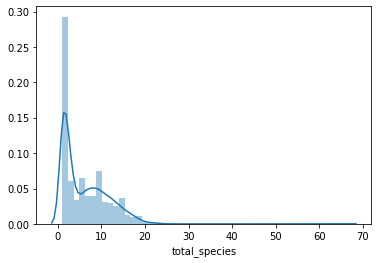

In [71]:
sns.distplot(presence_rsi['total_species'])

In [78]:
print(len(species_name_df['English_name'].unique()))
print(species_name_df['English_name'].unique())

40
['largemouth_bass' 'american_eel' 'brown_bullhead' 'channel_catfish'
 'white_perch' 'chain_pickerel' 'common_carp' 'silver_redhorse'
 'shorthead_redhorse' 'cisco' 'rock_bass' 'walleye' 'sauger'
 'lake_sturgeon' 'gulf_sturgeon' 'greenland_halibut' 'northern_pike'
 'lake_whitefish' 'goldeneye' 'burbot' 'freshwater_drum' 'black_crappie'
 'muskellunge' 'white_sucker' 'longnose_sucker' 'rock_cod' 'redhorse'
 'round_whitefish' 'arctic_chair' 'brook_trout' 'atlantic_salmon'
 'fallfish' 'yellow_perch' 'winter_cod' 'rose_fish' 'lake_trout'
 'rainbow_trout' 'brown_trout' 'splake' 'rainbow_smelt']


In [80]:
print(len(rsi_pres['Taxon'].unique()))
print(rsi_pres['Taxon'].unique())

223
['striped_bass' 'american_shad' 'white_sucker' 'channel_catfish' 'mooneye'
 'walleye' 'lake_sturgeon' 'rainbow_smelt' 'longnose_sucker' 'alewife'
 'american_eel' 'white_perch' 'quillback' 'smallmouth_bass'
 'silver_redhorse' 'logperch' 'tessellated_darter' 'brown_bullhead'
 'longnose_gar' 'freshwater_drum' 'fallfish' 'channel_darter'
 'emerald_shiner' 'johnny_darter' 'tadpole_madtom' 'trout-perch'
 'chestnut_lamprey' 'largemouth_bass' 'black_crappie' 'winter_flounder'
 'three-spined_stickleback' 'sand_shiner' 'common_carp' 'bowfin'
 'greater_redhorse' 'atlantic_mackerel' 'brook_trout' 'atlantic_snailfish'
 'greenland_cod' 'muskellunge' 'northern_pike' 'cisco' 'banded_killifish'
 'ocean_pout' 'ninespine_stickleback' 'polar_cod' 'tench'
 'atlantic_sturgeon' 'atlantic_herring' 'burbot' 'shorthead_redhorse'
 'mottled_sculpin' 'yellow_bullhead' 'american_gizzard_shad'
 'american_sand_lance' 'mimic_shiner' 'rock_bass' 'silver_lamprey'
 'golden_shiner' 'round_goby' 'atlantic_tomcod' 'lake

In [101]:
common_species = list(set(rsi_pres['Taxon'].unique()) & set(species_name_df['English_name'].unique()))
print(len(common_names), common_names)

31 ['walleye', 'brown_trout', 'fallfish', 'white_perch', 'rainbow_smelt', 'chain_pickerel', 'black_crappie', 'cisco', 'brown_bullhead', 'lake_trout', 'brook_trout', 'american_eel', 'silver_redhorse', 'rainbow_trout', 'muskellunge', 'northern_pike', 'lake_whitefish', 'channel_catfish', 'greenland_halibut', 'burbot', 'longnose_sucker', 'sauger', 'common_carp', 'rock_bass', 'lake_sturgeon', 'atlantic_salmon', 'shorthead_redhorse', 'yellow_perch', 'largemouth_bass', 'white_sucker', 'freshwater_drum']


In [102]:
[item for item in species_name_df['English_name'].unique() if item not in common_species]

['gulf_sturgeon',
 'goldeneye',
 'rock_cod',
 'redhorse',
 'round_whitefish',
 'arctic_char',
 'winter_cod',
 'rose_fish',
 'splake']

In [104]:
rsi_pres['Taxon'].unique()

array(['striped_bass', 'american_shad', 'white_sucker', 'channel_catfish',
       'mooneye', 'walleye', 'lake_sturgeon', 'rainbow_smelt',
       'longnose_sucker', 'alewife', 'american_eel', 'white_perch',
       'quillback', 'smallmouth_bass', 'silver_redhorse', 'logperch',
       'tessellated_darter', 'brown_bullhead', 'longnose_gar',
       'freshwater_drum', 'fallfish', 'channel_darter', 'emerald_shiner',
       'johnny_darter', 'tadpole_madtom', 'trout-perch',
       'chestnut_lamprey', 'largemouth_bass', 'black_crappie',
       'winter_flounder', 'three-spined_stickleback', 'sand_shiner',
       'common_carp', 'bowfin', 'greater_redhorse', 'atlantic_mackerel',
       'brook_trout', 'atlantic_snailfish', 'greenland_cod',
       'muskellunge', 'northern_pike', 'cisco', 'banded_killifish',
       'ocean_pout', 'ninespine_stickleback', 'polar_cod', 'tench',
       'atlantic_sturgeon', 'atlantic_herring', 'burbot',
       'shorthead_redhorse', 'mottled_sculpin', 'yellow_bullhead',
   

# Alberta

In [7]:
for df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Alberta/Stocking/2009esrdfishstocking.csv')
print(df.dtypes)
display(df.head(), df.tail())

WATERBODY ID       int64
OFFICIAL NAME     object
COMMON NAME       object
LONG             float64
LAT              float64
ATS               object
SHIPMENT DATE     object
SPECIES           object
QUANTITY           int64
GENOTYPE          object
AVG. LENGTH       object
dtype: object


,WATERBODY ID,OFFICIAL NAME,COMMON NAME,LONG,LAT,ATS,SHIPMENT DATE,SPECIES,QUANTITY,GENOTYPE,AVG. LENGTH
0,6734,UNNAMED,NICHOLAS SHERAN PARK POND,-112.879725,49.671905,SE26-8-22-W4,4/17/2009,BKTR,120,Diploid,46
1,6751,UNNAMED,MAGRATH CHILDREN'S POND,-112.869274,49.407453,SW26-5-22-W4,4/18/2009,RNTR,500,Diploid,20
2,6757,UNNAMED,MCQUILLAN RESERVOIR,-112.459320,49.647070,SW13-8-19-W4,4/18/2009,RNTR,3650,Diploid,20
3,6818,UNNAMED,GOLDSPRING PARK POND,-111.995479,49.095497,NE6-2-15-W4,4/18/2009,RNTR,1500,Diploid,20
4,6810,UNNAMED,GRANUM POND,-113.507613,49.862522,SE31-10-26-W4,4/18/2009,RNTR,450,Diploid,20


,WATERBODY ID,OFFICIAL NAME,COMMON NAME,LONG,LAT,ATS,SHIPMENT DATE,SPECIES,QUANTITY,GENOTYPE,AVG. LENGTH
534,6831,UNNAMED,FOREMOST RESERVOIR,-111.456691,49.477485,NW17-6-11-W4,10/20/2009,RNTR,2991,Diploid,24
535,6882,UNNAMED,BOW CITY EAST PONDS,-112.255516,50.430146,SE15-17-17-W4,10/20/2009,RNTR,3000,Diploid,24
536,5569,PHYLLIS LAKE,,-114.966667,52.100000,NW17-36-7-W5,10/21/2009,RNTR,50,Diploid,69
537,5804,SHUNDA LAKE,FISH LAKE,-116.149976,52.451617,SW19-40-15-W5,10/22/2009,RNTR,100,Diploid,55
538,3499,CHAIN LAKES RESERVOIR,,-114.208020,50.236864,NE4-15-2-W5,11/13/2009,RNTR,4895,Pressure Treated as Triploid,11


In [183]:
path = '/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Alberta/Used/Stocking/'

stocking_df = []
length_df = []

for file in os.listdir(path):
    year = file.split('esrd')[0]
    print(year)
    
    df = pd.read_csv(f"{path}{file}")
    print(f"# species = {df['SPECIES'].unique()}")
    stocking_df.append(df)
    length_df.append(len(df))

print(length_df)

2009
# species = ['BKTR' 'RNTR' 'BNTR' 'WALL' 'ARGR' 'GRCR' 'CTTR' 'BLTR']
2010
# species = ['BNTR' 'BKTR' 'RNTR' 'WALL' 'CTTR' 'BLTR']
2011
# species = ['RNTR' 'BKTR' 'BNTR' 'WALL' 'GRCR' 'CTTR']
2012
# species = ['BKTR' 'RNTR' 'BNTR' 'ARGR' 'WALL' 'CTTR']
2013
# species = ['RNTR' 'BKTR' 'BNTR' 'ARGR' 'CTTR']
2014
# species = ['RNTR' 'BNTR' 'BKTR' 'CTTR' 'WALL']
2015
# species = ['RNTR' 'CTTR' 'BKTR' 'BNTR']
[539, 539, 570, 567, 455, 336, 79]


In [184]:
stocking_df = pd.concat(stocking_df)
stocking_df.drop(columns=['ATS', 'AVG. LEGTH', 'AVG. LENGTH', 'GENOTYPE', 'WATERBODY ID'], inplace=True)
print(len(stocking_df))
stocking_df['SHIPMENT DATE'] = pd.to_datetime(stocking_df['SHIPMENT DATE'])
stocking_df['year'] = pd.DatetimeIndex(stocking_df['SHIPMENT DATE']).year
stocking_df['lat_long'] = stocking_df['LAT'].round(4).astype(str) + '_' + stocking_df['LONG'].round(4).astype(str)
display(stocking_df.head())

3085


/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,COMMON NAME,LAT,LONG,OFFICIAL NAME,QUANTITY,SHIPMENT DATE,SPECIES,SPECIES_NAME,year,lat_long
0,NICHOLAS SHERAN PARK POND,49.671905,-112.879725,UNNAMED,120,2009-04-17,BKTR,NaN,2009,49.6719_-112.8797
1,MAGRATH CHILDREN'S POND,49.407453,-112.869274,UNNAMED,500,2009-04-18,RNTR,NaN,2009,49.4075_-112.8693
2,MCQUILLAN RESERVOIR,49.647070,-112.459320,UNNAMED,3650,2009-04-18,RNTR,NaN,2009,49.6471_-112.4593
3,GOLDSPRING PARK POND,49.095497,-111.995479,UNNAMED,1500,2009-04-18,RNTR,NaN,2009,49.0955_-111.9955
4,GRANUM POND,49.862522,-113.507613,UNNAMED,450,2009-04-18,RNTR,NaN,2009,49.8625_-113.5076


In [185]:
for col in stocking_df['SPECIES'].unique():
    stocking_df[col] = np.where(stocking_df.isin([col]).any(1), 1, np.nan)
    stocking_df[col] = stocking_df[col].fillna(stocking_df.groupby(['year', 'lat_long'])[col].transform('mean'))
stocking_df.head()

,COMMON NAME,LAT,LONG,OFFICIAL NAME,QUANTITY,SHIPMENT DATE,SPECIES,SPECIES_NAME,year,lat_long,BKTR,RNTR,BNTR,WALL,ARGR,GRCR,CTTR,BLTR
0,NICHOLAS SHERAN PARK POND,49.671905,-112.879725,UNNAMED,120,2009-04-17,BKTR,NaN,2009,49.6719_-112.8797,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MAGRATH CHILDREN'S POND,49.407453,-112.869274,UNNAMED,500,2009-04-18,RNTR,NaN,2009,49.4075_-112.8693,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,MCQUILLAN RESERVOIR,49.647070,-112.459320,UNNAMED,3650,2009-04-18,RNTR,NaN,2009,49.6471_-112.4593,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,GOLDSPRING PARK POND,49.095497,-111.995479,UNNAMED,1500,2009-04-18,RNTR,NaN,2009,49.0955_-111.9955,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,GRANUM POND,49.862522,-113.507613,UNNAMED,450,2009-04-18,RNTR,NaN,2009,49.8625_-113.5076,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
stocking_df.drop_duplicates(inplace=True)
display(stocking_df.head())
print(len(stocking_df))
stocking_df.to_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Alberta/Processed/stocking_2009_2015.csv', index=False)

,COMMON NAME,LAT,LONG,OFFICIAL NAME,QUANTITY,SHIPMENT DATE,SPECIES,SPECIES_NAME,year,lat_long,BKTR,RNTR,BNTR,WALL,ARGR,GRCR,CTTR,BLTR
0,NICHOLAS SHERAN PARK POND,49.671905,-112.879725,UNNAMED,120,2009-04-17,BKTR,NaN,2009,49.6719_-112.8797,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MAGRATH CHILDREN'S POND,49.407453,-112.869274,UNNAMED,500,2009-04-18,RNTR,NaN,2009,49.4075_-112.8693,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,MCQUILLAN RESERVOIR,49.647070,-112.459320,UNNAMED,3650,2009-04-18,RNTR,NaN,2009,49.6471_-112.4593,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,GOLDSPRING PARK POND,49.095497,-111.995479,UNNAMED,1500,2009-04-18,RNTR,NaN,2009,49.0955_-111.9955,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,GRANUM POND,49.862522,-113.507613,UNNAMED,450,2009-04-18,RNTR,NaN,2009,49.8625_-113.5076,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


3024


In [225]:
# Fish survey

df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Alberta/To_look_at/FishSurvey.csv')
df = df[['SPEC_CODE', 'SPEC_NAME', 'INV_PROJ_I', 'INV_SURVEY', 'SURVEY_COM', 'TERMINATIO', 'SURVEY_TYP', 'WTB_OFFICI',
         'LATITUDE', 'LONGITUDE']]
print(len(df))
display(df.head())

393469


,SPEC_CODE,SPEC_NAME,INV_PROJ_I,INV_SURVEY,SURVEY_COM,TERMINATIO,SURVEY_TYP,WTB_OFFICI,LATITUDE,LONGITUDE
0,NRPK,NORTHERN PIKE,43,27102,,8/11/1981 0:00:00,Seine;Trawl,ADAIR CREEK,59.077800,-117.747883
1,LKCH,LAKE CHUB,19735,1334643,,10/7/2015 0:00:00,Electrofishing,ALICE CREEK,58.288301,-113.200405
2,LKCH,LAKE CHUB,19735,1334642,,10/2/2015 0:00:00,Electrofishing,ALICE CREEK,58.288301,-113.200405
3,LKCH,LAKE CHUB,19735,1334647,,10/2/2015 0:00:00,Electrofishing,ALICE CREEK,58.215301,-113.187304
4,LKCH,LAKE CHUB,19735,1334639,,10/2/2015 0:00:00,Electrofishing,ALICE CREEK,58.288301,-113.200405


In [226]:
df = df[df['TERMINATIO'] != 'Test Net']

df['TERMINATIO'] = pd.to_datetime(df['TERMINATIO'])
df['year_termination'] = pd.DatetimeIndex(df['TERMINATIO']).year

df['lat_long'] = df['LATITUDE'].round(3).astype(str) + '_' + df['LONGITUDE'].round(3).astype(str)
df['SPEC_NAME'] = df['SPEC_NAME'].str.lower().str.replace(' ', '_')

df.replace(r'^\s+$', np.nan, regex=True, inplace=True)
df.dropna(subset=['SPEC_CODE'], inplace=True)
print(len(df))

display(df.tail())

335952


,SPEC_CODE,SPEC_NAME,INV_PROJ_I,INV_SURVEY,SURVEY_COM,TERMINATIO,SURVEY_TYP,WTB_OFFICI,LATITUDE,LONGITUDE,year_termination,lat_long
393457,WHSC,white_sucker,19393,1296847,Baited Minnow.,2013-06-19,"Trap nets, Minnow Traps, Dip Nets",ZAMA RIVER,59.045663,-118.901958,2013.0,59.046_-118.902
393458,WHSC,white_sucker,21027,1475260,NaN,2014-07-16,"Trap nets, Minnow Traps, Dip Nets",ZAMA RIVER,59.045635,-118.902048,2014.0,59.046_-118.902
393459,BRST,brook_stickleback,21027,1475267,NaN,2014-07-12,"Trap nets, Minnow Traps, Dip Nets",UNNAMED,59.040185,-118.906105,2014.0,59.04_-118.906
393461,FNDC,finescale_dace,21027,1475259,NaN,2014-07-16,"Trap nets, Minnow Traps, Dip Nets",ZAMA RIVER,59.045635,-118.902048,2014.0,59.046_-118.902
393462,BRST,brook_stickleback,21027,1475259,NaN,2014-07-16,"Trap nets, Minnow Traps, Dip Nets",ZAMA RIVER,59.045635,-118.902048,2014.0,59.046_-118.902


In [117]:
# df[df['SURVEY_COM'].notna()]['SURVEY_COM'].to_csv('/mnt/c/Users/imrit/Desktop/survey_comments.csv', index=False)

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [227]:
%%time
df.replace(dict_species_name, inplace=True)

CPU times: user 1min 20s, sys: 3.3 s, total: 1min 24s
Wall time: 1min 25s


In [228]:
display(df.head())

,SPEC_CODE,SPEC_NAME,INV_PROJ_I,INV_SURVEY,SURVEY_COM,TERMINATIO,SURVEY_TYP,WTB_OFFICI,LATITUDE,LONGITUDE,year_termination,lat_long
0,NRPK,esox_lucius,43,27102,NaN,1981-08-11,Seine;Trawl,ADAIR CREEK,59.077800,-117.747883,1981.0,59.078_-117.748
1,LKCH,couesius_plumbeus,19735,1334643,NaN,2015-10-07,Electrofishing,ALICE CREEK,58.288301,-113.200405,2015.0,58.288_-113.2
2,LKCH,couesius_plumbeus,19735,1334642,NaN,2015-10-02,Electrofishing,ALICE CREEK,58.288301,-113.200405,2015.0,58.288_-113.2
3,LKCH,couesius_plumbeus,19735,1334647,NaN,2015-10-02,Electrofishing,ALICE CREEK,58.215301,-113.187304,2015.0,58.215_-113.187
4,LKCH,couesius_plumbeus,19735,1334639,NaN,2015-10-02,Electrofishing,ALICE CREEK,58.288301,-113.200405,2015.0,58.288_-113.2


In [229]:
%%time
for col in df['SPEC_NAME'].unique():
    df[col] = np.where(df.isin([col]).any(1), 1, np.nan)
    df[col] = df[col].fillna(df.groupby(['year_termination', 'lat_long'])[col].transform('mean'))
    
display(df.head())

,SPEC_CODE,SPEC_NAME,INV_PROJ_I,INV_SURVEY,SURVEY_COM,TERMINATIO,SURVEY_TYP,WTB_OFFICI,LATITUDE,LONGITUDE,...,cottus_spp,noturus_flavus,gasterosteus_aculeatus,triops,cichlidae,cyprinidae,cyprinus_rubrofuscus,coregonus_zenithicus,micropterus_dolomieu,ctenopharyngodon_idella
0,NRPK,esox_lucius,43,27102,NaN,1981-08-11,Seine;Trawl,ADAIR CREEK,59.077800,-117.747883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LKCH,couesius_plumbeus,19735,1334643,NaN,2015-10-07,Electrofishing,ALICE CREEK,58.288301,-113.200405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LKCH,couesius_plumbeus,19735,1334642,NaN,2015-10-02,Electrofishing,ALICE CREEK,58.288301,-113.200405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LKCH,couesius_plumbeus,19735,1334647,NaN,2015-10-02,Electrofishing,ALICE CREEK,58.215301,-113.187304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LKCH,couesius_plumbeus,19735,1334639,NaN,2015-10-02,Electrofishing,ALICE CREEK,58.288301,-113.200405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CPU times: user 7min 57s, sys: 4min 22s, total: 12min 19s
Wall time: 12min 25s


In [230]:
df.drop(columns=['SPEC_CODE', 'SPEC_NAME', 'SURVEY_COM', 'INV_PROJ_I', 'INV_SURVEY', 'SURVEY_TYP'], inplace=True)
print(len(df))
df.drop_duplicates(inplace=True)
print(len(df))
display(df.head())

335952
87187


,TERMINATIO,WTB_OFFICI,LATITUDE,LONGITUDE,year_termination,lat_long,esox_lucius,couesius_plumbeus,culaea_inconstans,catostomus_commersonii,...,cottus_spp,noturus_flavus,gasterosteus_aculeatus,triops,cichlidae,cyprinidae,cyprinus_rubrofuscus,coregonus_zenithicus,micropterus_dolomieu,ctenopharyngodon_idella
0,1981-08-11,ADAIR CREEK,59.077800,-117.747883,1981.0,59.078_-117.748,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-10-07,ALICE CREEK,58.288301,-113.200405,2015.0,58.288_-113.2,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-10-02,ALICE CREEK,58.288301,-113.200405,2015.0,58.288_-113.2,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-10-02,ALICE CREEK,58.215301,-113.187304,2015.0,58.215_-113.187,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-10-01,ALICE CREEK,58.215301,-113.187304,2015.0,58.215_-113.187,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
# df.to_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Alberta/Processed/fish_survey.csv', index=False)

In [195]:
species = [x for x in df['SPEC_NAME'].unique() if x != np.nan]
df['total_species'] = df[species].sum(axis=1)
sns.distplot(df['total_species'])

In [201]:
# Fish culture stocking

df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Alberta/FishCultureStocking.csv')
df.head()

,OID,SPEC_CODE,SPEC_NAME,INV_PROJ_I,TERMINATIO,LATITUDE,LONGITUDE,UTM_NORTHI,UTM_EASTIN,ATS_RANGE,...,UTM_MERIDI,WTB_ID,TTM_NORTHI,TTM_EASTIN,GENOTYPE,STRAIN,AVG_WEIGHT,STATION,AVG_LENGTH,Stocking_D
0,-1,NRPK,NORTHERN PIKE,18606,8/15/1957 0:00:00,54.053198,-111.372081,5989504.554,475641.42,10,...,-111 (Zone 12),5509,5993130.886,737360.817,2N,Historical Entry - Strain Unknown,1500,Unknown Station,0,
1,-1,WALL,WALLEYE,18609,7/2/1994 0:00:00,54.143062,-111.511662,5999559.958,466576.03,11,...,-111 (Zone 12),6063,6002660.041,727738.931,2N,Bistcho Lake,0.39,Cold Lake,3.73,
2,-1,WALL,WALLEYE,18608,7/20/1989 0:00:00,54.61404,-112.726508,6053213.249,388505.76,18,...,-111 (Zone 12),5820,6051796.088,646753.198,2N,Historical Entry - Strain Unknown,0.95,Cold Lake,5.02,
3,-1,NRPK,NORTHERN PIKE,18606,5/15/1968 0:00:00,54.176603,-111.51632,6003294.01,466299.015,11,...,-111 (Zone 12),5181,6006373.258,727250.959,2N,Historical Entry - Strain Unknown,0.01,Unknown Station,0,
4,-1,LKWH,LAKE WHITEFISH,18589,4/11/1932 0:00:00,54.362184,-111.889992,6024184.689,442169.748,13,...,-111 (Zone 12),6149,6025865.938,701973.256,2N,Historical Entry - Strain Unknown,0.01,Canyon Creek Hatchery,0,


In [213]:
df = df[df['TERMINATIO'] != 'TERMINATIO']
df['TERMINATIO'] = pd.to_datetime(df['TERMINATIO'])
df = df[['SPEC_CODE', 'SPEC_NAME', 'TERMINATIO', 'SURVEY_TYP', 'LATITUDE', 'LONGITUDE', 'WTB_OFFICI', 'STATION']]

for col in ['LATITUDE', 'LONGITUDE']:
    df[col] = df[col].astype(float)
    
df['lat_long'] = df['LATITUDE'].round(3).astype(str) + '_' + df['LONGITUDE'].round(3).astype(str)
df['SPEC_NAME'] = df['SPEC_NAME'].str.lower().str.replace(' ', '_')

df.replace(r'^\s+$', np.nan, regex=True, inplace=True)
df.dropna(subset=['SPEC_CODE'], inplace=True)
print(len(df))

df['year_termination'] = pd.DatetimeIndex(df['TERMINATIO']).year
display(df.tail())

21745


,SPEC_CODE,SPEC_NAME,TERMINATIO,SURVEY_TYP,LATITUDE,LONGITUDE,WTB_OFFICI,STATION,lat_long,year_termination
21742,RNTR,rainbow_trout,2003-05-14,Fish Culture Stocking,59.161004,-118.681101,UNNAMED,Cold Lake,59.161_-118.681,2003
21743,RNTR,rainbow_trout,1991-06-15,Fish Culture Stocking,59.161004,-118.681101,UNNAMED,Private Trout Producer,59.161_-118.681,1991
21744,RNTR,rainbow_trout,2007-05-23,Fish Culture Stocking,59.161004,-118.681101,UNNAMED,Cold Lake,59.161_-118.681,2007
21745,RNTR,rainbow_trout,1995-05-30,Fish Culture Stocking,59.161004,-118.681101,UNNAMED,Cold Lake,59.161_-118.681,1995
21746,RNTR,rainbow_trout,2013-05-22,Fish Culture Stocking,59.161004,-118.681101,UNNAMED,Cold Lake,59.161_-118.681,2013


In [220]:
df.replace(dict_species_name, inplace=True)

In [221]:
for col in df['SPEC_NAME'].unique():
    df[col] = np.where(df.isin([col]).any(1), 1, np.nan)
    df[col] = df[col].fillna(df.groupby(['year_termination', 'lat_long'])[col].transform('mean'))

display(df.tail())

,SPEC_CODE,SPEC_NAME,TERMINATIO,SURVEY_TYP,LATITUDE,LONGITUDE,WTB_OFFICI,STATION,lat_long,year_termination,...,oncorhynchus_aguabonita,salvelinus_namaycush,oncorhynchus_kisutch,salvelinus_confluentus,percopsis_omiscomaycus,pimephales_promelas,culaea_inconstans,coregonus_artedi,salvelinus_fontinalis_×_salvelinus_namaycush,micropterus_dolomieu
21742,RNTR,oncorhynchus_mykiss,2003-05-14,Fish Culture Stocking,59.161004,-118.681101,UNNAMED,Cold Lake,59.161_-118.681,2003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21743,RNTR,oncorhynchus_mykiss,1991-06-15,Fish Culture Stocking,59.161004,-118.681101,UNNAMED,Private Trout Producer,59.161_-118.681,1991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21744,RNTR,oncorhynchus_mykiss,2007-05-23,Fish Culture Stocking,59.161004,-118.681101,UNNAMED,Cold Lake,59.161_-118.681,2007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21745,RNTR,oncorhynchus_mykiss,1995-05-30,Fish Culture Stocking,59.161004,-118.681101,UNNAMED,Cold Lake,59.161_-118.681,1995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21746,RNTR,oncorhynchus_mykiss,2013-05-22,Fish Culture Stocking,59.161004,-118.681101,UNNAMED,Cold Lake,59.161_-118.681,2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
df.drop(columns=['SPEC_CODE', 'SPEC_NAME', 'SURVEY_TYP'], inplace=True)
print(len(df))
df.drop_duplicates(inplace=True)
print(len(df))
display(df.head())

21745
18537


,TERMINATIO,SURVEY_TYP,LATITUDE,LONGITUDE,WTB_OFFICI,STATION,lat_long,year_termination,esox_lucius,sander_vitreus,...,oncorhynchus_aguabonita,salvelinus_namaycush,oncorhynchus_kisutch,salvelinus_confluentus,percopsis_omiscomaycus,pimephales_promelas,culaea_inconstans,coregonus_artedi,salvelinus_fontinalis_×_salvelinus_namaycush,micropterus_dolomieu
0,1957-08-15,Fish Culture Stocking,54.053198,-111.372081,OWLSEYE LAKE,Unknown Station,54.053_-111.372,1957,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1994-07-02,Fish Culture Stocking,54.143062,-111.511662,UPPER MANN LAKE,Cold Lake,54.143_-111.512,1994,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1989-07-20,Fish Culture Stocking,54.614040,-112.726508,SKELETON LAKE,Cold Lake,54.614_-112.727,1989,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-05-15,Fish Culture Stocking,54.176603,-111.516320,LOWER MANN LAKE,Unknown Station,54.177_-111.516,1968,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1932-04-11,Fish Culture Stocking,54.362184,-111.889992,WHITEFISH LAKE,Canyon Creek Hatchery,54.362_-111.89,1932,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
# df.to_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Alberta/Processed/fish_culture_stocking.csv', index=False)

In [464]:
# Waterton

df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Alberta/Waterton_Lakes_NP_Freshwater_Stream_Fish_Occupancy_2016_data.csv')
df.columns = df.columns.str.replace(' ', '_')

df['latitude'], df['longitude'] = np.where(df['Universal_Transverse_Mercator_Zone'] == 12, 
                                           (utm.to_latlon(df['Easting_coordinate'], df['Northing_coordinate'], 12, 'U')), 
                                           np.nan)
df['latitude'], df['longitude'] = np.where(df['Universal_Transverse_Mercator_Zone'] == 11, 
                                           (utm.to_latlon(df['Easting_coordinate'], df['Northing_coordinate'], 11, 'U')), 
                                           (df['latitude'], df['longitude']))

display(df.head())

,Watershed,Site,Stream,Universal_Transverse_Mercator_Zone,Easting_coordinate,Northing_coordinate,latitude,longitude,Stream_Order,Wetted_Width_(meters),...,brook_trout,bull_trout,rainbow_trout,longnose_dace,longnose_sucker,white_sucker,trout_perch,burbot,CTTR/RBTR_hybrid,brown_trout
0,WATERTON,18,Crooked,11,284838,5445388,49.123630,-119.949173,4,5.3,...,0.0,0.0,0.0,29.0,12.0,16.0,14.0,1.0,NaN,NaN
1,WATERTON,18,Crooked,11,284838,5445388,49.123630,-119.949173,4,5.3,...,0.0,0.0,0.0,13.0,NaN,1.0,7.0,NaN,NaN,NaN
2,WATERTON,21,Blakiston,11,716887,5445698,49.125808,-114.027050,3,3.9,...,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WATERTON,21,Blakiston,11,716887,5445698,49.125808,-114.027050,3,3.9,...,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WATERTON,24,Blue Grouse,11,709176,5444564,49.118292,-114.133194,1,1.9,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [465]:
df.rename(columns=dict_species_name, inplace=True)
df_species_names = [x for x in list(dict_species_name.values()) if x in df.columns]
df_species_names = list(dict.fromkeys(df_species_names))

waterton_cols = ['Stream', 'latitude', 'longitude', 'year']
waterton_cols.extend(df_species_names)

df.replace('No Rep', '99/99/2016', inplace=True)
df['year'] = df['DATE_(date/month/year)'].str.split('/').str.get(2).astype(int)

In [466]:
df = df[waterton_cols]
df['lat_long'] = df['latitude'].round(3).astype(str) + '_' + df['longitude'].round(3).astype(str)
df.head()

,Stream,latitude,longitude,year,catostomus_commersonii,catostomus_catostomus,percopsis_omiscomaycus,salvelinus_fontinalis,lota_lota,oncorhynchus_mykiss,rhinichthys_cataractae,salmo_trutta,salvelinus_confluentus,oncorhynchus_clarkii,lat_long
0,Crooked,49.123630,-119.949173,2016,16.0,12.0,14.0,0.0,1.0,0.0,29.0,NaN,0.0,0.0,49.124_-119.949
1,Crooked,49.123630,-119.949173,2016,1.0,NaN,7.0,0.0,NaN,0.0,13.0,NaN,0.0,0.0,49.124_-119.949
2,Blakiston,49.125808,-114.027050,2016,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,10.0,0.0,49.126_-114.027
3,Blakiston,49.125808,-114.027050,2016,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,6.0,0.0,49.126_-114.027
4,Blue Grouse,49.118292,-114.133194,2016,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,49.118_-114.133


In [468]:
for col in df_col_names:
    df[col] = np.where(df[col].notnull(), 1, df[col])
    df[col] = df[col].fillna(df.groupby(['year', 'lat_long'])[col].transform('sum'))

In [472]:
print(len(df))
df.drop_duplicates(inplace=True)
print(len(df))
display(df.head())

# df.to_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Alberta/Processed/waterton_occurrence_2016_1.csv', index=False)

27
27


,Stream,latitude,longitude,year,catostomus_commersonii,catostomus_catostomus,percopsis_omiscomaycus,salvelinus_fontinalis,lota_lota,oncorhynchus_mykiss,rhinichthys_cataractae,salmo_trutta,salvelinus_confluentus,oncorhynchus_clarkii,lat_long
0,Crooked,49.123630,-119.949173,2016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,49.124_-119.949
2,Blakiston,49.125808,-114.027050,2016,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,49.126_-114.027
4,Blue Grouse,49.118292,-114.133194,2016,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,49.118_-114.133
6,Blakiston,49.112009,-114.078900,2016,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,49.112_-114.079
8,Bauerman,49.151866,-114.085320,2016,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,49.152_-114.085


In [496]:
# Waterton 2011

df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Alberta/Waterton_Lakes_NP_Freshwater_Lake_Fish_Index_2016_data.csv')
df = df[['Lake Name', 'Species - Present (2011)']]
df.rename(columns={'Species - Present (2011)': 'species_present'}, inplace=True)
df.dropna(inplace=True)

df.replace('cuttthroat_trout', 'cutthroat_trout', inplace=True)

df.replace(dict_species_name, inplace=True)
print(len(df))
display(df.head())

79


,Lake Name,species_present
0,Lineham North,oncorhynchus_clarkii
1,Lineham North,oncorhynchus_mykiss
4,Lineham Hourglass,oncorhynchus_clarkii
9,Cameron,salvelinus_fontinalis
10,Cameron,oncorhynchus_mykiss


In [497]:
df['latitude'] = 'TO_GET'
df['longitude'] = 'TO_GET'
df['year'] = 2011

for col in df['species_present'].unique():
    df[col] = np.where(df.isin([col]).any(1), 1, np.nan)
    df[col] = df[col].fillna(df.groupby('Lake Name')[col].transform('mean'))
    
display(df.sample(10))

,Lake Name,species_present,latitude,longitude,year,oncorhynchus_clarkii,oncorhynchus_mykiss,salvelinus_fontinalis,salvelinus_namaycush,salvelinus_confluentus,...,coregonus_clupeaformis,prosopium_coulterii,esox_lucius,lota_lota,myoxocephalus_thompsonii,couesius_plumbeus,catostomus_catostomus,catostomus_commersonii,percopsis_omiscomaycus,salmo_trutta
56,Lower (Middle) Waterton,catostomus_catostomus,TO_GET,TO_GET,2011,1.0,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0
29,Upper Waterton,prosopium_coulterii,TO_GET,TO_GET,2011,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
98,Lower Twin,salvelinus_fontinalis,TO_GET,TO_GET,2011,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lineham North,oncorhynchus_mykiss,TO_GET,TO_GET,2011,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Lower (Middle) Waterton,oncorhynchus_mykiss,TO_GET,TO_GET,2011,1.0,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0
40,Upper Waterton,oncorhynchus_mykiss,TO_GET,TO_GET,2011,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
27,Upper Waterton,prosopium_williamsoni,TO_GET,TO_GET,2011,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
108,Beaver Pond (Hatchery),salvelinus_fontinalis,TO_GET,TO_GET,2011,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Knight's/Lower Wtn.,lota_lota,TO_GET,TO_GET,2011,1.0,NaN,NaN,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0
50,Lower (Middle) Waterton,coregonus_clupeaformis,TO_GET,TO_GET,2011,1.0,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0


In [498]:
print(len(df))
df.drop(columns=['species_present'], inplace=True)
df.drop_duplicates(inplace=True)
print(len(df))
display(df.head())

79
23


,Lake Name,latitude,longitude,year,oncorhynchus_clarkii,oncorhynchus_mykiss,salvelinus_fontinalis,salvelinus_namaycush,salvelinus_confluentus,prosopium_williamsoni,coregonus_clupeaformis,prosopium_coulterii,esox_lucius,lota_lota,myoxocephalus_thompsonii,couesius_plumbeus,catostomus_catostomus,catostomus_commersonii,percopsis_omiscomaycus,salmo_trutta
0,Lineham North,TO_GET,TO_GET,2011,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lineham Hourglass,TO_GET,TO_GET,2011,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Cameron,TO_GET,TO_GET,2011,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Akamina,TO_GET,TO_GET,2011,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Lower Carthiew,TO_GET,TO_GET,2011,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [500]:
# df.to_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Alberta/Processed/waterton_2011_occurence.csv', index=True)

In [82]:
# Banff

df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Alberta/To_look_at/Banff_NP_Freshwater_Lake_Fish_Index_2017_data.csv')
df = df[['Lake Name', 'Present Condition']]
df.rename(columns={'Present Condition': 'present_condition'}, inplace=True)
df = df[~df['present_condition'].isin(['Fishless ', 'Fishless'])]
df['year'] = 2017
df['latitude'], df['longitude'] = 'TO_GET', 'TO_GET'
display(df)

,Lake Name,present_condition,year,latitude,longitude
0,Alexandra Pond,SPLK,2017,TO_GET,TO_GET
4,Altrude (2),WSCT,2017,TO_GET,TO_GET
7,Arnica,WSCT,2017,TO_GET,TO_GET
8,Badger,BKTR,2017,TO_GET,TO_GET
9,Baker Lake,BKTR,2017,TO_GET,TO_GET
...,...,...,...,...,...
164,Warden Lake - upper,"BKTR, RNTR, SPLK",2017,TO_GET,TO_GET
165,Watchman Lake,CTTR,2017,TO_GET,TO_GET
166,Waterfowl (Lower),"BKTR, RNTR",2017,TO_GET,TO_GET
167,Waterfowl (Upper),"BKTR, RNTR",2017,TO_GET,TO_GET


In [83]:
df = df.assign(present_condition=df['present_condition'].str.split(',')).explode('present_condition')
df['present_condition'] = df['present_condition'].str.replace(' ', '')
display(df)

,Lake Name,present_condition,year,latitude,longitude
0,Alexandra Pond,SPLK,2017,TO_GET,TO_GET
4,Altrude (2),WSCT,2017,TO_GET,TO_GET
7,Arnica,WSCT,2017,TO_GET,TO_GET
8,Badger,BKTR,2017,TO_GET,TO_GET
9,Baker Lake,BKTR,2017,TO_GET,TO_GET
...,...,...,...,...,...
166,Waterfowl (Lower),BKTR,2017,TO_GET,TO_GET
166,Waterfowl (Lower),RNTR,2017,TO_GET,TO_GET
167,Waterfowl (Upper),BKTR,2017,TO_GET,TO_GET
167,Waterfowl (Upper),RNTR,2017,TO_GET,TO_GET


In [84]:
df.replace(dict_code_name, inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop_duplicates(inplace=True)
df.replace(dict_species_name, inplace=True)
df.head()

,Lake Name,present_condition,year,latitude,longitude
0,Alexandra Pond,salvelinus_fontinalis_×_salvelinus_namaycush,2017,TO_GET,TO_GET
1,Altrude (2),oncorhynchus_clarkii,2017,TO_GET,TO_GET
2,Arnica,oncorhynchus_clarkii,2017,TO_GET,TO_GET
3,Badger,salvelinus_fontinalis,2017,TO_GET,TO_GET
4,Baker Lake,salvelinus_fontinalis,2017,TO_GET,TO_GET


In [85]:
for col in df['present_condition']:
    df[col] = np.where(df.isin([col]).any(1), 1, np.nan)
    df[col] = df[col].fillna(df.groupby('Lake Name')[col].transform('mean'))

display(df.head())

,Lake Name,present_condition,year,latitude,longitude,salvelinus_fontinalis_×_salvelinus_namaycush,oncorhynchus_clarkii,salvelinus_fontinalis,salvelinus_alpinus,salvelinus_confluentus,...,prosopium_williamsoni,oncorhynchus_mykiss,catostomus_catostomus,catostomus_commersonii,coregonus_artedi,oncorhynchus_clarkii_bouvieri,salvelinus_confluentus_x_oncorhynchus_clarkii,salmo_trutta,coregonus_clupeaformis,rhinichthys_cataractae
0,Alexandra Pond,salvelinus_fontinalis_×_salvelinus_namaycush,2017,TO_GET,TO_GET,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Altrude (2),oncorhynchus_clarkii,2017,TO_GET,TO_GET,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arnica,oncorhynchus_clarkii,2017,TO_GET,TO_GET,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Badger,salvelinus_fontinalis,2017,TO_GET,TO_GET,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Baker Lake,salvelinus_fontinalis,2017,TO_GET,TO_GET,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df.drop(columns=['present_condition'], inplace=True)
print(len(df))
df.drop_duplicates(inplace=True)
print(len(df))

display(df.sample(5))

155
92


,Lake Name,year,latitude,longitude,salvelinus_fontinalis_×_salvelinus_namaycush,oncorhynchus_clarkii,salvelinus_fontinalis,salvelinus_alpinus,salvelinus_confluentus,salvelinus_namaycush,prosopium_williamsoni,oncorhynchus_mykiss,catostomus_catostomus,catostomus_commersonii,coregonus_artedi,oncorhynchus_clarkii_bouvieri,salvelinus_confluentus_x_oncorhynchus_clarkii,salmo_trutta,coregonus_clupeaformis,rhinichthys_cataractae
27,Dolomite (Upper),2017,TO_GET,TO_GET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,Ptarmigan Lake,2017,TO_GET,TO_GET,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Block (1),2017,TO_GET,TO_GET,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,Lake Margaret,2017,TO_GET,TO_GET,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,Red Deer Lakes,2017,TO_GET,TO_GET,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# df.to_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Alberta/Processed/Banff_NP_freshwater_occurence_2017.csv', 
#           index=True)

In [158]:
# Wild Fish communities, Oil Sands Region

df_2013 = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Alberta/WildFishCommFishHealth-CommDePoissonsSauvagesSanteDesPoissons-2013-v1.csv')
df_2013.drop(columns=['Fork Length (mm) / La longueur à la fourche (mm)', 'Total Weight (g) / Poids total (g)', 
                      'Notes / Remarques', 'Site Name / Nom du site', 'Reach Code / Code de allonge'], inplace=True)

df_2013.head()

,Waterbody Name / Le nom du plan d'eau,Site & Description / Site et description,Latitude (Decimal Degrees) / Latitude (degrés décimaux),Longitude (Decimal Degrees) / Longitude (degrés décimaux),Date (yyyy-mm-dd) / Date (aaaa-mm-jj),Species / Espèce
0,Ells River,Upper Ells,57.229000,-111.890361,2013-09-23,Finescale Dace (FNDC)
1,Ells River,Upper Ells,57.229000,-111.890361,2013-09-23,Finescale Dace (FNDC)
2,Ells River,Upper Ells,57.229000,-111.890361,2013-09-23,Finescale Dace (FNDC)
3,Dunkirk River,Dunkirk - West of Fort McMurray,56.854766,-112.708400,2013-09-24,Longnose Dace (LNDC)
4,Dunkirk River,Dunkirk - West of Fort McMurray,56.854766,-112.708400,2013-09-24,Longnose Dace (LNDC)


In [159]:
wild_fish_com_col_names = {'Site Name / Nom du site': 'site_name', "Waterbody Name / Le nom du plan d'eau": 'waterbody_name', 
                           'Site & Description / Site et description': 'site_description', 
                           'Reach Code / Code de allonge': 'reach_code', 
                           'Latitude (Decimal Degrees) / Latitude (degrés décimaux)': 'latitude', 
                           'Longitude (Decimal Degrees) / Longitude (degrés décimaux)': 'longitude', 
                           'Date (yyyy-mm-dd) / Date (aaaa-mm-jj)': 'date', 'Species / Espèce': 'species'}

In [160]:
df_2013.rename(columns=wild_fish_com_col_names, inplace=True)
df_2013['year'] = pd.DatetimeIndex(pd.to_datetime(df_2013['date'])).year

print(len(df_2013))
df_2013.drop(columns=['date'], inplace=True)
df_2013.drop_duplicates(inplace=True)
print(len(df_2013))

df_2013['lat_long'] = df_2013['latitude'].round(3).astype(str) + '_' +  df_2013['longitude'].round(3).astype(str)

df_2013['species'] = df_2013['species'].str.split("\(").str.get(0).str.replace(' ', '_').str.rstrip('_').str.lower()
df_2013.replace(dict_species_name, inplace=True)
display(df_2013.sample(5))

954
25


,waterbody_name,site_description,latitude,longitude,species,year,lat_long
924,Ells River,Upper Ells,57.229000,-111.890361,percopsis_omiscomaycus,2013,57.229_-111.89
3,Dunkirk River,Dunkirk - West of Fort McMurray,56.854766,-112.708400,rhinichthys_cataractae,2013,56.855_-112.708
439,Ells River,Lower Ells,57.266300,-111.734200,margariscus_margarita,2013,57.266_-111.734
494,Ells River,Middle RAMP,57.221307,-111.988604,margariscus_margarita,2013,57.221_-111.989
911,Ells River,Middle RAMP,57.221307,-111.988604,cottus_ricei,2013,57.221_-111.989


In [161]:
for col in df_2013['species'].unique():
    df_2013[col] = np.where(df_2013.isin([col]).any(1), 1, np.nan)
    df_2013[col] = df_2013[col].fillna(df_2013.groupby('lat_long')[col].transform('mean'))

display(df_2013.sample(5))

,waterbody_name,site_description,latitude,longitude,species,year,lat_long,chrosomus_neogaeus,rhinichthys_cataractae,catostomus_catostomus,margariscus_margarita,cottus_cognatus,cottus_ricei,percopsis_omiscomaycus,catostomus_commersonii
931,Ells River,Middle RAMP,57.221307,-111.988604,catostomus_commersonii,2013,57.221_-111.989,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0
114,Firebag River,Middle Firebag,57.434495,-110.892203,rhinichthys_cataractae,2013,57.434_-110.892,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
503,Ells River,Upper Ells,57.229000,-111.890361,margariscus_margarita,2013,57.229_-111.89,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0
494,Ells River,Middle RAMP,57.221307,-111.988604,margariscus_margarita,2013,57.221_-111.989,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0
51,Ells River,Lower Ells,57.266300,-111.734200,rhinichthys_cataractae,2013,57.266_-111.734,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN


In [162]:
print(len(df_2013))
df_2013.drop(columns=['species'], inplace=True)
df_2013.drop_duplicates(inplace=True)
print(len(df_2013))
display(df_2013)

25
10


,waterbody_name,site_description,latitude,longitude,year,lat_long,chrosomus_neogaeus,rhinichthys_cataractae,catostomus_catostomus,margariscus_margarita,cottus_cognatus,cottus_ricei,percopsis_omiscomaycus,catostomus_commersonii
0,Ells River,Upper Ells,57.229000,-111.890361,2013,57.229_-111.89,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0
3,Dunkirk River,Dunkirk - West of Fort McMurray,56.854766,-112.708400,2013,56.855_-112.708,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
20,High Hills River,High Hills - East of Fort McMurray,56.753900,-110.508300,2013,56.754_-110.508,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
26,Horse River,Horse - West of Fort McMurray,56.361369,-112.176207,2013,56.361_-112.176,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
51,Ells River,Lower Ells,57.266300,-111.734200,2013,57.266_-111.734,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN
105,Steepbank River,Lower Steepbank,57.023410,-111.473296,2013,57.023_-111.473,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
114,Firebag River,Middle Firebag,57.434495,-110.892203,2013,57.434_-110.892,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
125,Steepbank River,Middle Steepbank,56.991376,-111.339277,2013,56.991_-111.339,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
351,Steepbank River,Upper Steepbank,56.851905,-112.262351,2013,56.852_-112.262,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
421,Ells River,Middle RAMP,57.221307,-111.988604,2013,57.221_-111.989,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0


In [163]:
# 2017

df_2017 = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Alberta/WildFishCommFishHealth-CommDePoissionsSauvagesSanteDesPoissons-2017-v1.csv')
df_2017.drop(columns=['Fork Length (mm) / La longueur à la fourche (mm)', 'Total Weight (g) / Poids total (g)', 
                      'Notes / Remarques', 'Site Name / Nom du site', 'Reach Code / Code de allonge', 
                      'Total Length (mm) / Longueur total (mm)'], inplace=True)

df_2017.head()

,Waterbody Name / Le nom du plan d'eau,Site & Description / Site et description,Latitude (Decimal Degrees) / Latitude (degrés décimaux),Longitude (Decimal Degrees) / Longitude (degrés décimaux),Date (yyyy-mm-dd) / Date (aaaa-mm-jj),Species / Espèce
0,Christina River,Christina-2,56.7539,-110.5083,2017-10-03,Longnose Dace (Longnose Sucker (LNSC))
1,Christina River,Christina-2,56.7539,-110.5083,2017-10-03,Longnose Sucker (LNSC)
2,Christina River,Christina-2,56.7539,-110.5083,2017-10-03,Finescale Dace (FNDC)
3,Christina River,Christina-2,56.7539,-110.5083,2017-10-03,Finescale Dace (FNDC)
4,Christina River,Christina-2,56.7539,-110.5083,2017-10-03,Finescale Dace (FNDC)


In [164]:
df_2017.rename(columns=wild_fish_com_col_names, inplace=True)
df_2017['year'] = pd.DatetimeIndex(pd.to_datetime(df_2017['date'])).year

print(len(df_2017))
df_2017.drop(columns=['date'], inplace=True)
df_2017.drop_duplicates(inplace=True)
print(len(df_2017))

df_2017['lat_long'] = df_2017['latitude'].round(3).astype(str) + '_' +  df_2017['longitude'].round(3).astype(str)

df_2017['species'] = df_2017['species'].str.split("\(").str.get(0).str.replace(' ', '_').str.rstrip('_').str.lower()
df_2017.replace(dict_species_name, inplace=True)
display(df_2017.sample(5))

338
60


,waterbody_name,site_description,latitude,longitude,species,year,lat_long
182,Christina River,Christina-4,55.888699,-111.539965,percopsis_omiscomaycus,2017,55.889_-111.54
138,Christina River,Christina-1,56.666930,-111.064791,cottus_ricei,2017,56.667_-111.065
11,Christina River,Christina-2,56.753900,-110.508300,percopsis_omiscomaycus,2017,56.754_-110.508
12,Christina River,Christina-2,56.753900,-110.508300,couesius_plumbeus,2017,56.754_-110.508
321,Birch Creek,Birch,55.614420,-111.124628,culaea_inconstans,2017,55.614_-111.125


In [165]:
for col in df_2017['species'].unique():
    df_2017[col] = np.where(df_2017.isin([col]).any(1), 1, np.nan)
    df_2017[col] = df_2017[col].fillna(df_2017.groupby('lat_long')[col].transform('mean'))

display(df_2017.sample(5))

,waterbody_name,site_description,latitude,longitude,species,year,lat_long,rhinichthys_cataractae,catostomus_catostomus,chrosomus_neogaeus,...,cottus_cognatus,catostomus_commersonii,chrosomus_eos,hiodon_alosoides,perca_flavescens,cottus_ricei,culaea_inconstans,artic_grayling,pimephales_promelas,etheostoma_exile
283,Sunday Creek,Sunday-2,55.560995,-111.090609,esox_lucius,2017,55.561_-111.091,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
130,Christina River,Christina-1,56.666930,-111.064791,chrosomus_neogaeus,2017,56.667_-111.065,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
62,Sunday Creek,Sunday-1,55.584120,-110.893442,esox_lucius,2017,55.584_-110.893,NaN,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,Christina River,Christina-3,55.719685,-111.220095,pimephales_promelas,2017,55.72_-111.22,NaN,1.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
13,Christina River,Christina-2,56.753900,-110.508300,notropis_hudsonius,2017,56.754_-110.508,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
print(len(df_2017))
df_2017.drop(columns=['species'], inplace=True)
df_2017.drop_duplicates(inplace=True)
print(len(df_2017))
display(df_2017)

60
11


,waterbody_name,site_description,latitude,longitude,year,lat_long,rhinichthys_cataractae,catostomus_catostomus,chrosomus_neogaeus,esox_lucius,...,cottus_cognatus,catostomus_commersonii,chrosomus_eos,hiodon_alosoides,perca_flavescens,cottus_ricei,culaea_inconstans,artic_grayling,pimephales_promelas,etheostoma_exile
0,Christina River,Christina-2,56.753900,-110.508300,2017,56.754_-110.508,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Jackfish River,Jackfish,55.672346,-111.099532,2017,55.672_-111.1,1.0,1.0,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,Sunday Creek,Sunday-1,55.584120,-110.893442,2017,55.584_-110.893,NaN,1.0,NaN,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,Christina River,Christina-1,56.666930,-111.064791,2017,56.667_-111.065,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
166,Christina River,Christina-4,55.888699,-111.539965,2017,55.889_-111.54,NaN,1.0,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
199,Christina River,Christina-3,55.719685,-111.220095,2017,55.72_-111.22,NaN,1.0,1.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
266,Unnamed Creek,Unnamed,55.618160,-110.718805,2017,55.618_-110.719,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,Unnamed Creek,Unnamed,55.584273,-110.823274,2017,55.584_-110.823,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,Sawbones Creek,Sawbones,55.650398,-110.817812,2017,55.65_-110.818,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,Sunday Creek,Sunday-2,55.560995,-111.090609,2017,55.561_-111.091,NaN,NaN,NaN,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0


In [178]:
# 2019

df_2019 = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Alberta/WildFishCommFishHealth-CommDePoissonsSauvagesSanteDesPoissons-2019-1.csv')
df_2019.drop(columns=['Fork Length (mm) / La longueur à la fourche (mm)', 'Total Weight (g) / Poids total (g)', 
                      'Notes / Remarques', 'Site Name / Nom du site', 'Reach Code / Code de allonge'], inplace=True)

df_2019.head()

,Waterbody Name / Le nom du plan d'eau,Site & Description / Site et description,Latitude (Decimal Degrees) / Latitude (degrés décimaux),Longitude (Decimal Degrees) / Longitude (degrés décimaux),Date (yyyy-mm-dd) / Date (aaaa-mm-jj),Species / Espèce
0,Steepbank River,Upper RAMP - 150m upstream of start co-ordinat...,56.822919,-110.980353,2019-09-24,SLIMY SCULPIN -SLSC
1,Steepbank River,Upper RAMP - 150m upstream of start co-ordinat...,56.822919,-110.980353,2019-09-24,SLIMY SCULPIN -SLSC
2,Steepbank River,Upper RAMP - 150m upstream of start co-ordinat...,56.822919,-110.980353,2019-09-24,SLIMY SCULPIN -SLSC
3,Steepbank River,Upper RAMP - 150m upstream of start co-ordinat...,56.822919,-110.980353,2019-09-24,SLIMY SCULPIN -SLSC
4,Steepbank River,Upper RAMP - 150m upstream of start co-ordinat...,56.822919,-110.980353,2019-09-24,SLIMY SCULPIN -SLSC


In [179]:
df_2019.rename(columns=wild_fish_com_col_names, inplace=True)
df_2019['year'] = pd.DatetimeIndex(pd.to_datetime(df_2019['date'])).year

print(len(df_2019))
df_2019.drop(columns=['date'], inplace=True)
df_2019.drop_duplicates(inplace=True)
print(len(df_2019))

df_2019['lat_long'] = df_2019['latitude'].round(3).astype(str) + '_' +  df_2019['longitude'].round(3).astype(str)

df_2019['species'] = df_2019['species'].str.split('-').str.get(0).str.replace(' ', '_').str.rstrip('_').str.lower()
df_2019.replace(dict_species_name, inplace=True)
display(df_2019.sample(5))

2175
82


,waterbody_name,site_description,latitude,longitude,species,year,lat_long
831,Firebag River,150m upstream of start co-ordinate (57.436916;...,57.434560,-110.892410,couesius_plumbeus,2019,57.435_-110.892
1548,Muskeg River,150m upstream of start co-ordinate (57.130550;...,57.130494,-111.593965,lota_lota,2019,57.13_-111.594
783,Firebag River,150m upstream of start co-ordinate (57.335257;...,57.335136,-110.476200,cottoidea_spp,2019,57.335_-110.476
1953,Calumet River,150m upstream of start co-ordinate (57.403308...,57.403831,-111.684532,chrosomus_neogaeus,2019,57.404_-111.685
1084,Dunkirk River,150m upstream of start co-ordinate (56.859746;...,56.859693,-112.711679,esox_lucius,2019,56.86_-112.712


In [181]:
for col in df_2019['species'].unique():
    df_2019[col] = np.where(df_2019.isin([col]).any(1), 1, np.nan)
    df_2019[col] = df_2019[col].fillna(df_2019.groupby('lat_long')[col].transform('mean'))

display(df_2019.sample(5))

,waterbody_name,site_description,latitude,longitude,species,year,lat_long,cottus_cognatus,catostomus_catostomus,margariscus_margarita,...,cottus_ricei,cyprinidae_spp,cottoidea_spp,pungitius_pungitius,thymallus_arcticus,chrosomus_eos,esox_lucius,culaea_inconstans,perca_flavescens,chrosomus_neogaeus
811,Firebag River,150m upstream of start co-ordinate (57.335257;...,57.335136,-110.476200,pungitius_pungitius,2019,57.335_-110.476,NaN,1.0,NaN,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1367,Horse River,150m upstream of start co-ordinate (56.361770;...,56.361678,-112.175221,culaea_inconstans,2019,56.362_-112.175,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
285,Steepbank River,Upper ECCC - 150m upstream of start co-ordinat...,56.863433,-111.126440,rhinichthys_cataractae,2019,56.863_-111.126,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,Steepbank River,Upper ECCC - 150m upstream of start co-ordinat...,56.863433,-111.126440,catostomus_commersonii,2019,56.863_-111.126,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,Steepbank River,150m upstream of start co-ordinate (57.024114;...,57.023653,-111.473053,cyprinidae_spp,2019,57.024_-111.473,1.0,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
print(len(df_2019))
df_2019.drop(columns=['species'], inplace=True)
df_2019.drop_duplicates(inplace=True)
print(len(df_2019))
display(df_2019)

82
13


,waterbody_name,site_description,latitude,longitude,year,lat_long,cottus_cognatus,catostomus_catostomus,margariscus_margarita,couesius_plumbeus,...,cottus_ricei,cyprinidae_spp,cottoidea_spp,pungitius_pungitius,thymallus_arcticus,chrosomus_eos,esox_lucius,culaea_inconstans,perca_flavescens,chrosomus_neogaeus
0,Steepbank River,Upper RAMP - 150m upstream of start co-ordinat...,56.822919,-110.980353,2019,56.823_-110.98,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,Steepbank River,Upper ECCC - 150m upstream of start co-ordinat...,56.863433,-111.126440,2019,56.863_-111.126,1.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,Steepbank River,150m upstream of start co-ordinate (56.991100;...,56.991623,-111.333979,2019,56.992_-111.334,1.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631,Steepbank River,150m upstream of start co-ordinate (57.024114;...,57.023653,-111.473053,2019,57.024_-111.473,1.0,NaN,NaN,1.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,Firebag River,150m upstream of start co-ordinate (57.335257;...,57.335136,-110.476200,2019,57.335_-110.476,NaN,1.0,NaN,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
830,Firebag River,150m upstream of start co-ordinate (57.436916;...,57.434560,-110.892410,2019,57.435_-110.892,NaN,1.0,NaN,1.0,...,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
943,Firebag River,150m upstream of start co-ordinate (57.516291;...,57.515820,-111.113120,2019,57.516_-111.113,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
1013,High Hills River,150m upstream of start co-ordinate (56.753725;...,56.753541,-110.509801,2019,56.754_-110.51,1.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1084,Dunkirk River,150m upstream of start co-ordinate (56.859746;...,56.859693,-112.711679,2019,56.86_-112.712,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1252,Horse River,150m upstream of start co-ordinate (56.361770;...,56.361678,-112.175221,2019,56.362_-112.175,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [189]:
# merge 2013, 2017, 2019

wild_fish_comm_oil_sands = pd.concat([df_2013, df_2017, df_2019], sort=False)
print(len(wild_fish_comm_oil_sands))
display(wild_fish_comm_oil_sands.sample(10))

# wild_fish_comm_oil_sands.to_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Alberta/Processed/wild_fish_comm_oil_sands_occurence_2013_2017_2019.csv', 
#                                 index=False)

34


,waterbody_name,site_description,latitude,longitude,year,lat_long,chrosomus_neogaeus,rhinichthys_cataractae,catostomus_catostomus,margariscus_margarita,...,perca_flavescens,culaea_inconstans,artic_grayling,pimephales_promelas,etheostoma_exile,salmonidae_spp,cyprinidae_spp,cottoidea_spp,pungitius_pungitius,thymallus_arcticus
122,Christina River,Christina-1,56.666930,-111.064791,2017,56.667_-111.065,1.0,1.0,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1608,Tar River,150m upstream of start co-ordinate (57.393686;...,57.394026,-111.985955,2019,57.394_-111.986,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
51,Ells River,Lower Ells,57.266300,-111.734200,2013,57.266_-111.734,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,Sunday Creek,Sunday-1,55.584120,-110.893442,2017,55.584_-110.893,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1252,Horse River,150m upstream of start co-ordinate (56.361770;...,56.361678,-112.175221,2019,56.362_-112.175,NaN,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
26,Horse River,Horse - West of Fort McMurray,56.361369,-112.176207,2013,56.361_-112.176,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631,Steepbank River,150m upstream of start co-ordinate (57.024114;...,57.023653,-111.473053,2019,57.024_-111.473,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
114,Firebag River,Middle Firebag,57.434495,-110.892203,2013,57.434_-110.892,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dunkirk River,Dunkirk - West of Fort McMurray,56.854766,-112.708400,2013,56.855_-112.708,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1084,Dunkirk River,150m upstream of start co-ordinate (56.859746;...,56.859693,-112.711679,2019,56.86_-112.712,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# New Brunswick

In [217]:
# Bay of Fundy

df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/New_Brunswick/minas_basin_bay_of_fundy.csv')

df = df[['scientificName', 'eventDate', 'decimalLongitude', 'decimalLatitude', 'waterBody', 'year', 'class']]
df = df[df['class'].isin(['Actinopterygii'])]
df.rename(columns={'decimalLongitude': 'longitude', 'decimalLatitude': 'latitude'}, inplace=True)
df.drop(columns=['eventDate', 'class'], inplace=True)

df['scientificName'] = df['scientificName'].str.lower().str.replace(' ', '_')
df['lat_long'] = df['latitude'].round(3).astype(str) + '_' + df['longitude'].round(3).astype(str)
df.head()

,scientificName,longitude,latitude,waterBody,year,lat_long
1,alosa_pseudoharengus,-64.105719,45.381385,Bay of Fundy,2009,45.381_-64.106
2,morone_saxatilis,-64.005356,45.227681,Bay of Fundy,2009,45.228_-64.005
3,scophthalmus_aquosus,-64.005356,45.227681,Bay of Fundy,2009,45.228_-64.005
5,alosa_sapidissima,-64.105719,45.381385,Bay of Fundy,2009,45.381_-64.106
6,acipenser_oxyrinchus,-64.005356,45.227681,Bay of Fundy,2009,45.228_-64.005


In [218]:
for col in df['scientificName'].unique():
    df[col] = np.where(df.isin([col]).any(1), 1, np.nan)
    df[col] = df[col].fillna(df.groupby('lat_long')[col].transform('mean'))

display(df.head())

,scientificName,longitude,latitude,waterBody,year,lat_long,alosa_pseudoharengus,morone_saxatilis,scophthalmus_aquosus,alosa_sapidissima,acipenser_oxyrinchus,pseudopleuronectes_americanus,hemitripterus_americanus,alosa_aestivalis,myoxocephalus_octodecemspinosus
1,alosa_pseudoharengus,-64.105719,45.381385,Bay of Fundy,2009,45.381_-64.106,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
2,morone_saxatilis,-64.005356,45.227681,Bay of Fundy,2009,45.228_-64.005,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN
3,scophthalmus_aquosus,-64.005356,45.227681,Bay of Fundy,2009,45.228_-64.005,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN
5,alosa_sapidissima,-64.105719,45.381385,Bay of Fundy,2009,45.381_-64.106,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
6,acipenser_oxyrinchus,-64.005356,45.227681,Bay of Fundy,2009,45.228_-64.005,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN


In [219]:
df.drop(columns=['scientificName'], inplace=True)
print(len(df))
df.drop_duplicates(inplace=True)
print(len(df))
display(df.head())

# df.to_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/New_Brunswick/Processed/bay_of_fundy_occurence_2009.csv', 
#           index=False)

15
2


,longitude,latitude,waterBody,year,lat_long,alosa_pseudoharengus,morone_saxatilis,scophthalmus_aquosus,alosa_sapidissima,acipenser_oxyrinchus,pseudopleuronectes_americanus,hemitripterus_americanus,alosa_aestivalis,myoxocephalus_octodecemspinosus
1,-64.105719,45.381385,Bay of Fundy,2009,45.381_-64.106,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
2,-64.005356,45.227681,Bay of Fundy,2009,45.228_-64.005,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN


In [237]:
# accdc

df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/New_Brunswick/accdc.csv')
df = df[['scientificName', 'eventDate', 'decimalLongitude', 'decimalLatitude', 'waterBody', 'year', 'class']]
df = df[df['class'].isin(['Actinopterygii'])]
df.rename(columns={'decimalLongitude': 'longitude', 'decimalLatitude': 'latitude'}, inplace=True)
df.drop(columns=['eventDate', 'class'], inplace=True)
df.dropna(subset=['year'], inplace=True)

df['scientificName'] = df['scientificName'].str.lower().str.replace(' ', '_')
df['lat_long'] = df['latitude'].round(3).astype(str) + '_' + df['longitude'].round(3).astype(str)
df.head()

,scientificName,longitude,latitude,waterBody,year,lat_long
21,salmo_salar,-60.788610,46.662315,NaN,2002.0,46.662_-60.789
62,acipenser_brevirostrum,-65.900002,45.500000,NaN,2000.0,45.5_-65.9
111,salmo_salar,-66.363792,46.656895,NaN,2002.0,46.657_-66.364
113,salmo_salar,-62.705540,46.319361,NaN,2002.0,46.319_-62.706
123,salmo_salar,-62.281525,45.114655,NaN,2002.0,45.115_-62.282


In [238]:
for col in df['scientificName'].unique():
    df[col] = np.where(df.isin([col]).any(1), 1, np.nan)
    df[col] = df[col].fillna(df.groupby('lat_long')[col].transform('mean'))

display(df.head())

,scientificName,longitude,latitude,waterBody,year,lat_long,salmo_salar,acipenser_brevirostrum,coregonus_huntsmani,acipenser_oxyrinchus
21,salmo_salar,-60.788610,46.662315,NaN,2002.0,46.662_-60.789,1.0,NaN,NaN,NaN
62,acipenser_brevirostrum,-65.900002,45.500000,NaN,2000.0,45.5_-65.9,NaN,1.0,NaN,NaN
111,salmo_salar,-66.363792,46.656895,NaN,2002.0,46.657_-66.364,1.0,NaN,NaN,NaN
113,salmo_salar,-62.705540,46.319361,NaN,2002.0,46.319_-62.706,1.0,NaN,NaN,NaN
123,salmo_salar,-62.281525,45.114655,NaN,2002.0,45.115_-62.282,1.0,NaN,NaN,NaN


In [239]:
df.drop(columns=['scientificName'], inplace=True)
print(len(df))
df.drop_duplicates(inplace=True)
print(len(df))
display(df.head())

# df.to_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/New_Brunswick/Processed/accdc_occurence_2009.csv', 
#           index=False)

48
48


,longitude,latitude,waterBody,year,lat_long,salmo_salar,acipenser_brevirostrum,coregonus_huntsmani,acipenser_oxyrinchus
21,-60.788610,46.662315,NaN,2002.0,46.662_-60.789,1.0,NaN,NaN,NaN
62,-65.900002,45.500000,NaN,2000.0,45.5_-65.9,NaN,1.0,NaN,NaN
111,-66.363792,46.656895,NaN,2002.0,46.657_-66.364,1.0,NaN,NaN,NaN
113,-62.705540,46.319361,NaN,2002.0,46.319_-62.706,1.0,NaN,NaN,NaN
123,-62.281525,45.114655,NaN,2002.0,45.115_-62.282,1.0,NaN,NaN,NaN


In [332]:
# Atlantic salmon smolt

atl_salmon_dict_df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/New_Brunswick/Used/atlantic_salmon_smolt_species_list.csv')
atl_salmon_dict_df['scientific_name'] = atl_salmon_dict_df['scientific_name'].str.lower().str.replace(' ', '_')
display(atl_salmon_dict_df.sample(5))

dict_atl_salmon = atl_salmon_dict_df.set_index('code_name').to_dict()['scientific_name']

,code_name,common_name,common_name_en__nom_commun_en,common_name_en__nom_commun_fr,life_stage_en__étape_de_vie_en,life_stage_fr__étape_de_vie_fr,scientific_name,ITIS_TSN
13,ATSA(sal),Atlantic salmon,Atlantic salmon,saumon atlantique,salmon,saumon,salmo_linnaeus,161996.0
33,FALL,Fallfish,Fallfish,ouitouche,NaN,NaN,semotilus_corporalis,163375.0
2,4SST,stickleback,4 spine stickleback,épinoche à quatre épines,NaN,NaN,apeletes_quadracus,166397.0
9,ALME,Atlantic menhaden,Atlantic menhaden,alose tyran,NaN,NaN,brevoortia_tyrannus,161732.0
46,MINN,Minnows (non specific),Minnows (non specific),ménés (non spécifique),NaN,NaN,phoxinus_phoxinus,163342.0


In [333]:
df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/New_Brunswick/atlantic_salmon_smolt.csv')
df.drop(columns=[col for col in df.columns if '_avg_fork_length' in col], inplace=True)
df.drop(columns=[col for col in df.columns if '_avg_weight' in col], inplace=True)
df.drop(columns=[col for col in df.columns if '_avg_total_length' in col], inplace=True)

df.columns = df.columns.str.replace('_abundance', '')
df.drop(columns=['avg_air_temp_arrival', 'avg_max_air_temp', 'avg_water_temp_shore'], inplace=True)
df['lat_long'] = df['site_latitude'].round(3).astype(str) + '_' + df['site_longitude'].round(3).astype(str)

display(df.head())

,year,site_name,site_latitude,site_longitude,3SST,9SST,ALEW,AMEL,AMSH,ATSA(sm),...,SALA,SELA,SELA(am),SELA(si),SLSC,STIC,SUCK,WHSU,YEPE,lat_long
0,2002,Butters-RST (Restigouche River),47.9867,-66.8023,NaN,NaN,3.0,429.0,1.0,692.0,...,NaN,NaN,NaN,NaN,1.0,1645.0,12.0,NaN,NaN,47.987_-66.802
1,2002,Kedgwick-RST (Kedgwick River),47.6711,-67.5098,NaN,NaN,NaN,72.0,NaN,1279.0,...,1.0,NaN,39.0,11.0,3.0,14.0,6.0,2.0,NaN,47.671_-67.51
2,2002,LittleMainRestigouche-RST (Little Main Restigo...,47.5285,-67.6187,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.528_-67.619
3,2002,Moses-RST (Restigouche River),47.9971,-66.8159,NaN,NaN,NaN,32.0,NaN,86.0,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,47.997_-66.816
4,2002,Upsalquitch-RST (Upsalquitch River),47.8532,-66.9092,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.853_-66.909


In [334]:
df.rename(columns = dict_atl_salmon, inplace=True)
df.drop(columns = [col for col in df.columns if 'remove' in col], inplace=True)
df.head()

,year,site_name,site_latitude,site_longitude,gasterosteus_aculeatus,pungitius_pungitius,alosa_pseudoharengus,anguilla_rostrata,alosa_sapidissima,salmo_linnaeus,...,prosopium_cylindraceum,petromyzon_marinus,petromyzon_marinus,petromyzon_marinus,cottus_cognatus,gasterosteidae_spp,catostomidae_spp,catostomus_commersoni,perca_flavescens,lat_long
0,2002,Butters-RST (Restigouche River),47.9867,-66.8023,NaN,NaN,3.0,429.0,1.0,692.0,...,NaN,NaN,NaN,NaN,1.0,1645.0,12.0,NaN,NaN,47.987_-66.802
1,2002,Kedgwick-RST (Kedgwick River),47.6711,-67.5098,NaN,NaN,NaN,72.0,NaN,1279.0,...,2.0,NaN,39.0,11.0,3.0,14.0,6.0,2.0,NaN,47.671_-67.51
2,2002,LittleMainRestigouche-RST (Little Main Restigo...,47.5285,-67.6187,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.528_-67.619
3,2002,Moses-RST (Restigouche River),47.9971,-66.8159,NaN,NaN,NaN,32.0,NaN,86.0,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,47.997_-66.816
4,2002,Upsalquitch-RST (Upsalquitch River),47.8532,-66.9092,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.853_-66.909


In [335]:
df_2 = pd.DataFrame(df.groupby(['year', 'lat_long']).mean())
df_3 = pd.DataFrame(df.groupby(by=df.columns, axis=1).sum())

df_3['lat_long'] = df_3['site_latitude'].round(3).astype(str) + '_' + df_3['site_longitude'].round(3).astype(str)
df_3.replace(0, np.nan, inplace=True)

df_col_names = [col for col in df_3.columns if col in list(dict_atl_salmon.values())]
col_order = ['year', 'site_name', 'site_latitude', 'site_longitude', 'lat_long']
col_order.extend(df_col_names)

df_3 = df_3[col_order]

display(df_3.sample(5))

,year,site_name,site_latitude,site_longitude,lat_long,alosa_pseudoharengus,alosa_sapidissima,ameiurus_nebulosus,anguilla_rostrata,catostomidae_spp,...,perca_flavescens,petromyzon_marinus,petromyzontiformes_spp,prosopium_cylindraceum,pungitius_pungitius,rhinichthys_atratulus,salmo_linnaeus,salmo_trutta,salvelinus_fontinalis,semotilus_atromaculatus
61,2014,Kedgwick-RST (Kedgwick River),47.6711,-67.5098,47.671_-67.51,12.0,NaN,NaN,7.0,NaN,...,NaN,261.0,NaN,NaN,NaN,35.0,2032.0,NaN,17.0,NaN
78,2017,Moses-RST (Restigouche River),47.9971,-66.8159,47.997_-66.816,NaN,NaN,NaN,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,387.0,NaN,NaN,NaN
71,2016,Kedgwick-RST (Kedgwick River),47.6711,-67.5098,47.671_-67.51,2.0,NaN,NaN,12.0,NaN,...,NaN,152.0,NaN,NaN,NaN,10.0,2348.0,NaN,6.0,NaN
14,2004,Upsalquitch-RST (Upsalquitch River),47.8532,-66.9092,47.853_-66.909,NaN,NaN,NaN,156.0,52.0,...,NaN,1.0,8.0,NaN,NaN,153.0,1219.0,NaN,3.0,NaN
55,2013,Butters-RST (Restigouche River),47.9867,-66.8023,47.987_-66.802,NaN,NaN,NaN,24.0,NaN,...,NaN,1.0,NaN,NaN,NaN,8.0,21.0,NaN,NaN,NaN


In [336]:
df_col_names = [col for col in df_3.columns if col in list(dict_atl_salmon.values())]

for col in df_col_names:
    df_3[col] = np.where(df_3[col].notnull(), 1, df_3[col])
    df_3[col] = df_3[col].fillna(df_3.groupby(['year', 'lat_long'])[col].transform('mean'))
    
display(df_3.head())

,year,site_name,site_latitude,site_longitude,lat_long,alosa_pseudoharengus,alosa_sapidissima,ameiurus_nebulosus,anguilla_rostrata,catostomidae_spp,...,perca_flavescens,petromyzon_marinus,petromyzontiformes_spp,prosopium_cylindraceum,pungitius_pungitius,rhinichthys_atratulus,salmo_linnaeus,salmo_trutta,salvelinus_fontinalis,semotilus_atromaculatus
0,2002,Butters-RST (Restigouche River),47.9867,-66.8023,47.987_-66.802,1.0,1.0,NaN,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN
1,2002,Kedgwick-RST (Kedgwick River),47.6711,-67.5098,47.671_-67.51,NaN,NaN,NaN,1.0,1.0,...,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN
2,2002,LittleMainRestigouche-RST (Little Main Restigo...,47.5285,-67.6187,47.528_-67.619,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,Moses-RST (Restigouche River),47.9971,-66.8159,47.997_-66.816,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN
4,2002,Upsalquitch-RST (Upsalquitch River),47.8532,-66.9092,47.853_-66.909,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [337]:
print(len(df_3))
df_3.drop_duplicates(inplace=True)
print(len(df_3))

display(df_3.sample(5))

# df_3.to_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/New_Brunswick/Processed/atl_salmon_smolt_occurence_2002_2019.csv', 
#             index=False)

90
90


,year,site_name,site_latitude,site_longitude,lat_long,alosa_pseudoharengus,alosa_sapidissima,ameiurus_nebulosus,anguilla_rostrata,catostomidae_spp,...,perca_flavescens,petromyzon_marinus,petromyzontiformes_spp,prosopium_cylindraceum,pungitius_pungitius,rhinichthys_atratulus,salmo_linnaeus,salmo_trutta,salvelinus_fontinalis,semotilus_atromaculatus
18,2005,Moses-RST (Restigouche River),47.9971,-66.8159,47.997_-66.816,1.0,1.0,NaN,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN
38,2009,Moses-RST (Restigouche River),47.9971,-66.8159,47.997_-66.816,NaN,NaN,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
54,2012,Upsalquitch-RST (Upsalquitch River),47.8532,-66.9092,47.853_-66.909,NaN,NaN,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN
26,2007,Kedgwick-RST (Kedgwick River),47.6711,-67.5098,47.671_-67.51,NaN,NaN,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN
62,2014,LittleMainRestigouche-RST (Little Main Restigo...,47.5285,-67.6187,47.528_-67.619,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [352]:
# Stock assessment

df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/New_Brunswick/stock_assesment_data.csv')
df = df[['YEAR', 'lat', 'lon', 'scien']]

df['lat_long'] = df['lat'].round(3).astype(str) + '_' + df['lon'].round(3).astype(str)
df['scien'] = df['scien'].str.lower().str.replace(' ', '_')
df.replace('sebastes_sp.', 'sebastes_spp', inplace=True)
df.rename(columns={'YEAR': 'year'}, inplace=True)
df.head()

,year,lat,lon,scien,lat_long
0,1970,46.35000,-58.90000,gadus_morhua,46.35_-58.9
1,1976,46.66667,-59.46667,gadus_morhua,46.667_-59.467
2,1994,46.71467,-59.59683,gadus_morhua,46.715_-59.597
3,1990,46.13950,-58.77383,gadus_morhua,46.14_-58.774
4,1970,46.43333,-59.10000,gadus_morhua,46.433_-59.1


In [353]:
%%time

for col in df['scien'].unique():
    df[col] = np.where(df.isin([col]).any(1), 1, np.nan)
    df[col] = df[col].fillna(df.groupby(['year', 'lat_long'])[col].transform('mean'))
    
display(df.head())

,year,lat,lon,scien,lat_long,gadus_morhua,melanogrammus_aeglefinus,hippoglossoides_platessoides,pollachius_virens,urophycis_tenuis,hippoglossus_hippoglossus,pseudopleuronectes_americanus,merluccius_bilinearis,sebastes_spp
0,1970,46.35000,-58.90000,gadus_morhua,46.35_-58.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1976,46.66667,-59.46667,gadus_morhua,46.667_-59.467,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1994,46.71467,-59.59683,gadus_morhua,46.715_-59.597,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1990,46.13950,-58.77383,gadus_morhua,46.14_-58.774,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1970,46.43333,-59.10000,gadus_morhua,46.433_-59.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


CPU times: user 1.05 s, sys: 266 ms, total: 1.31 s
Wall time: 1.35 s


In [355]:
print(len(df))
df.drop(columns=['scien'], inplace=True)
df.drop_duplicates(inplace=True)
print(len(df))

display(df.sample(5))
# df.to_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/New_Brunswick/Processed/stock_assessment_1970_2012.csv', 
#           index=False)

68155
7671


,year,lat,lon,lat_long,gadus_morhua,melanogrammus_aeglefinus,hippoglossoides_platessoides,pollachius_virens,urophycis_tenuis,hippoglossus_hippoglossus,pseudopleuronectes_americanus,merluccius_bilinearis,sebastes_spp
1317,1990,45.24367,-57.67617,45.244_-57.676,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6150,2011,42.95350,-65.45800,42.954_-65.458,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6694,1982,43.91667,-67.10000,43.917_-67.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2814,1973,44.13333,-60.86667,44.133_-60.867,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6048,1990,42.91667,-66.61500,42.917_-66.615,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [379]:
# SWAM

path = '/mnt/c/Users/imrit/Downloads/Sharma_fish_project/New_Brunswick/SWAM_files/'

df = []

for file in os.listdir(path):
    species_name = file.split('_')[2].split('.xlsx')[0]
    year = file.split('_')[1]
    df_temp = pd.read_excel(f'{path}{file}')
    
    df_temp['year'] = pd.DatetimeIndex(pd.to_datetime(df_temp['Date'])).year
    df_temp['lat_long'] = df_temp['Lat'].round(3).astype(str) + '_' + df_temp['Long'].round(3).astype(str)
    df_temp['species'] = species_name.replace(' ', '_')
    
    df.append(df_temp)
    
df = pd.concat(df)
df= df[['year', 'Lat', 'Long', 'lat_long', 'species']]
df.drop_duplicates(inplace=True)
df.head()

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,year,Lat,Long,lat_long,species
0,2015,45.82982,-65.22385,45.83_-65.224,anguilla_rostrata
1,2015,45.72493,-65.20672,45.725_-65.207,anguilla_rostrata
2,2015,45.79116,-65.17107,45.791_-65.171,anguilla_rostrata
3,2015,45.82706,-65.21902,45.827_-65.219,anguilla_rostrata
4,2015,45.83904,-65.24611,45.839_-65.246,anguilla_rostrata


In [381]:
for col in df['species'].unique():
    df[col] = np.where(df.isin([col]).any(1), 1, np.nan)
    df[col] = df[col].fillna(df.groupby(['year', 'lat_long'])[col].transform('mean'))
    
display(df.head())

,year,Lat,Long,lat_long,species,anguilla_rostrata,catostomus_commersonii,cottus_cognatus,gasterosteus_aculeatus,lota_lota,luxilus_cornutus,notemigonus_crysoleucas,notropis_heterolepis,petromyzon_marinus,pungitius_pungitius,rhinichthys_atratulus,salmo_salar,salvelinus_fontinalis
0,2015,45.82982,-65.22385,45.83_-65.224,anguilla_rostrata,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2015,45.72493,-65.20672,45.725_-65.207,anguilla_rostrata,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2015,45.79116,-65.17107,45.791_-65.171,anguilla_rostrata,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2015,45.82706,-65.21902,45.827_-65.219,anguilla_rostrata,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2015,45.83904,-65.24611,45.839_-65.246,anguilla_rostrata,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [382]:
print(len(df))
df.drop(columns=['species'], inplace=True)
df.drop_duplicates(inplace=True)
print(len(df))

display(df.sample(5))
# df.to_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/New_Brunswick/Processed/SWAM_2015_occurence.csv', 
#           index=False)

325
25


,year,Lat,Long,lat_long,anguilla_rostrata,catostomus_commersonii,cottus_cognatus,gasterosteus_aculeatus,lota_lota,luxilus_cornutus,notemigonus_crysoleucas,notropis_heterolepis,petromyzon_marinus,pungitius_pungitius,rhinichthys_atratulus,salmo_salar,salvelinus_fontinalis
21,2015,45.78099,-65.38686,45.781_-65.387,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,2015,45.81035,-65.29384,45.81_-65.294,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
16,2015,45.90413,-65.08794,45.904_-65.088,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,2015,45.76548,-65.42001,45.765_-65.42,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19,2015,45.77139,-65.32639,45.771_-65.326,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [397]:
# Kouchibouguac

df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/New_Brunswick/Used/Kouchibouguac_NP_Coastal_Marine_Estuarine_IBI_data_dictionary.csv', 
                 sep=';')

df['scientific_name'] = df['Date.of.sampling..dd.mm.yyyy.'].str.split('(').str.get(1).str.split(')').str.get(0)
df['scientific_name'] = df['scientific_name'].str.lower().str.replace(' ', '_')

dict_df_species = df.set_index('DATE.1').to_dict()['scientific_name']

In [440]:
df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/New_Brunswick/To_look_at/Kouchibouguac_NP_Coastal_Marine_Estuarine_IBI_1996-2018_data.csv')

df.rename(columns=dict_df_species, inplace=True)
df.replace(0, np.nan, inplace=True)

df['lat'], df['long'] = 'TO_GET', 'TO_GET'

df['year'] = df['DATE'].str.split('\(').str.get(0).str.split('-').str.get(-1).str.split('/').str.get(-1).astype(int)
df.dropna(subset=['STATION CODE'], inplace=True)

print(len(df))
display(df.sample(5))

890


,DATE,STATION NUMBER,STATION ZONE,STATION CODE,alosa_aestivalus,apeltes_quadracus,anguilla_rostrata,catostomus_commersoni,culaea_inconstans,fundulus_diaphanous,...,rhinichthys_atratulus,scopthalmus_aequosus,salvelinus_fontinalis,salmo_salar,syngnathus_fuscus,tautogolabrus_adspersus,urophycis_tenuis,lat,long,year
229,30-05-2001,14,Lagune Kouchibouguac Lagoon,KR14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TO_GET,TO_GET,2001
860,26-06-2018,15,Rivière Kouchibouguacis River,SLR15,NaN,4.0,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TO_GET,TO_GET,2018
232,31-05-2001,7,Rivière Kouchibouguac River (lower/inférieure),KR7,NaN,16.0,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,TO_GET,TO_GET,2001
223,29-05-2001,16,Rivière Kouchibouguacis River,SLR16,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TO_GET,TO_GET,2001
44,07/1997 (late),5,Rivière Kouchibouguac River (lower/inférieure),KR5,NaN,29.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TO_GET,TO_GET,1997


In [441]:
for col in df.columns[4:-3]:
    df[col] = np.where(df[col].notnull(), 1, df[col])
    df[col] = df[col].fillna(df.groupby(['year', 'STATION CODE'])[col].transform('mean'))

display(df.head())

,DATE,STATION NUMBER,STATION ZONE,STATION CODE,alosa_aestivalus,apeltes_quadracus,anguilla_rostrata,catostomus_commersoni,culaea_inconstans,fundulus_diaphanous,...,rhinichthys_atratulus,scopthalmus_aequosus,salvelinus_fontinalis,salmo_salar,syngnathus_fuscus,tautogolabrus_adspersus,urophycis_tenuis,lat,long,year
0,11-06-1996,4,Rivière Kouchibouguac River (lower/inférieure),KR4,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TO_GET,TO_GET,1996
1,11-06-1996,7,Rivière Kouchibouguac River (lower/inférieure),KR7,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TO_GET,TO_GET,1996
2,11-06-1996,14,Lagune Kouchibouguac Lagoon,KR14,1.0,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,TO_GET,TO_GET,1996
6,25-06-1996,2,Rivière Kouchibouguac River (upper/supérieure),KR2,1.0,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TO_GET,TO_GET,1996
7,25-06-1996,3,Rivière Kouchibouguac River (upper/supérieure),KR3,1.0,1.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TO_GET,TO_GET,1996


In [442]:
print(len(df))
df.drop(columns=['DATE'], inplace=True)
df.drop_duplicates(inplace=True)
print(len(df))

display(df.sample(5))
# df.to_csv('/mnt/c/Users/imrit/Downloads/Sharma_fish_project/New_Brunswick/Processed/kouchibouguac_1996_2016_occurence.csv', 
#           index=False)

890
232


,STATION NUMBER,STATION ZONE,STATION CODE,alosa_aestivalus,apeltes_quadracus,anguilla_rostrata,catostomus_commersoni,culaea_inconstans,fundulus_diaphanous,fundulus_heteroclitus,...,rhinichthys_atratulus,scopthalmus_aequosus,salvelinus_fontinalis,salmo_salar,syngnathus_fuscus,tautogolabrus_adspersus,urophycis_tenuis,lat,long,year
7,3,Rivière Kouchibouguac River (upper/supérieure),KR3,1.0,1.0,1.0,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TO_GET,TO_GET,1996
220,9,Rivière Black River,BR9,1.0,1.0,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TO_GET,TO_GET,2001
135,3,Rivière Kouchibouguac River (upper/supérieure),KR3,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TO_GET,TO_GET,2000
316,3,Rivière Kouchibouguac River (upper/supérieure),KR3,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TO_GET,TO_GET,2002
32,5,Rivière Kouchibouguac River (lower/inférieure),KR5,1.0,1.0,1.0,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TO_GET,TO_GET,1997


# PEI

In [434]:
df['year'].min()

1996